In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!pip install tensorflow numpy opencv-python matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [11]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to your original folders
drowsy_path = r"C:\Users\ujwal\Downloads\Driver Drowsiness Dataset (DDD) (1)\Drowsy"
non_drowsy_path = r"C:\Users\ujwal\Downloads\Driver Drowsiness Dataset (DDD) (1)\Non Drowsy"

# Create new dataset folder structure
base_dir = r"C:\Users\ujwal\Downloads\dataset.train"
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

# Create subfolders for drowsy and non_drowsy in train, validation, and test
for split in [train_dir, val_dir, test_dir]:
    os.makedirs(os.path.join(split, "drowsy"), exist_ok=True)
    os.makedirs(os.path.join(split, "non_drowsy"), exist_ok=True)

# Function to split and move files
def split_and_move_files(src_folder, train_folder, val_folder, test_folder, split_ratios=(0.7, 0.2, 0.1)):
    # Get all files in the source folder
    files = [f for f in os.listdir(src_folder) if os.path.isfile(os.path.join(src_folder, f))]
    
    if len(files) < 3:  # Not enough files for splitting into three sets
        raise ValueError(f"Not enough files in '{src_folder}' to split with ratios {split_ratios}. At least 3 files are required.")
    
    # Split files into train, validation, and test sets
    try:
        train_files, temp_files = train_test_split(files, test_size=split_ratios[1] + split_ratios[2], random_state=42)
        val_files, test_files = train_test_split(temp_files, test_size=split_ratios[2] / (split_ratios[1] + split_ratios[2]), random_state=42)
    except ValueError as e:
        raise ValueError(f"Error splitting files from '{src_folder}': {e}")
    
    # Function to move files safely
    def move_files(file_list, src_folder, dest_folder):
        for file in file_list:
            src_file = os.path.join(src_folder, file)
            dest_file = os.path.join(dest_folder, file)
            if not os.path.exists(dest_file):  # Avoid overwriting existing files
                shutil.move(src_file, dest_file)

    # Move files to their respective folders
    move_files(train_files, src_folder, train_folder)
    move_files(val_files, src_folder, val_folder)
    move_files(test_files, src_folder, test_folder)

# Split and move files for drowsy images
try:
    split_and_move_files(drowsy_path, 
                         os.path.join(train_dir, "drowsy"), 
                         os.path.join(val_dir, "drowsy"), 
                         os.path.join(test_dir, "drowsy"))
except ValueError as e:
    print(e)

# Split and move files for non_drowsy images
try:
    split_and_move_files(non_drowsy_path, 
                         os.path.join(train_dir, "non_drowsy"), 
                         os.path.join(val_dir, "non_drowsy"), 
                         os.path.join(test_dir, "non_drowsy"))
except ValueError as e:
    print(e)

print("Dataset split completed!")


Not enough files in 'C:\Users\ujwal\Downloads\Driver Drowsiness Dataset (DDD) (1)\Drowsy' to split with ratios (0.7, 0.2, 0.1). At least 3 files are required.
Not enough files in 'C:\Users\ujwal\Downloads\Driver Drowsiness Dataset (DDD) (1)\Non Drowsy' to split with ratios (0.7, 0.2, 0.1). At least 3 files are required.
Dataset split completed!


In [6]:
pip install tensorflow keras matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_path = r"C:\Users\ujwal\Downloads\dataset.train\train"
val_path = r"C:\Users\ujwal\Downloads\dataset.train\validation"
test_path = r"C:\Users\ujwal\Downloads\dataset.train\test"

# Image data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='binary'     # Binary classification: drowsy vs non-drowsy
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 29254 images belonging to 2 classes.
Found 8359 images belonging to 2 classes.
Found 4180 images belonging to 2 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output: 0 or 1
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification loss
    metrics=['accuracy']
)

model.summary()  # Print the model architecture


C:\Users\ujwal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Start with 10 epochs
    validation_data=val_generator
)


C:\Users\ujwal\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step - accuracy: 0.9158 - loss: 0.3452

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result of model training, for example:
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
model.save("saved_model/final_trained_model.h5")


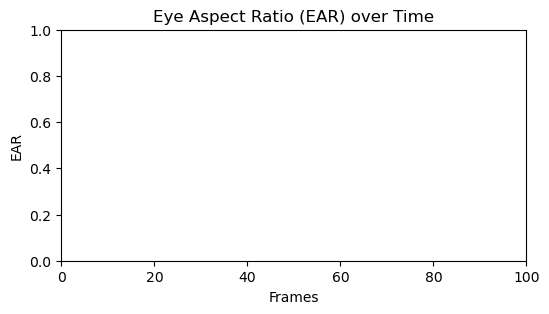

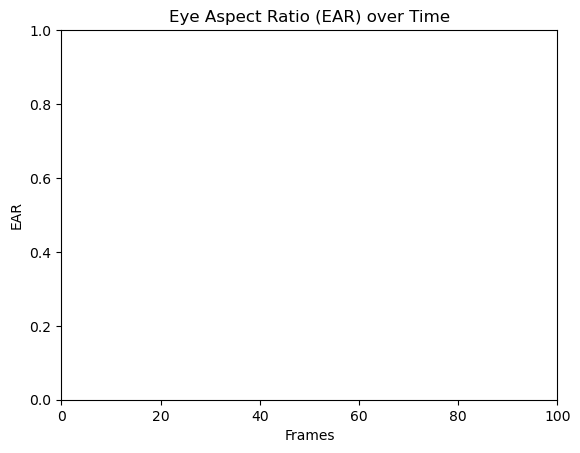

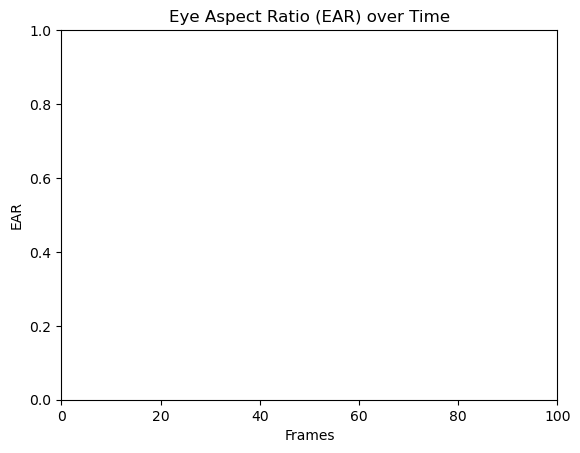

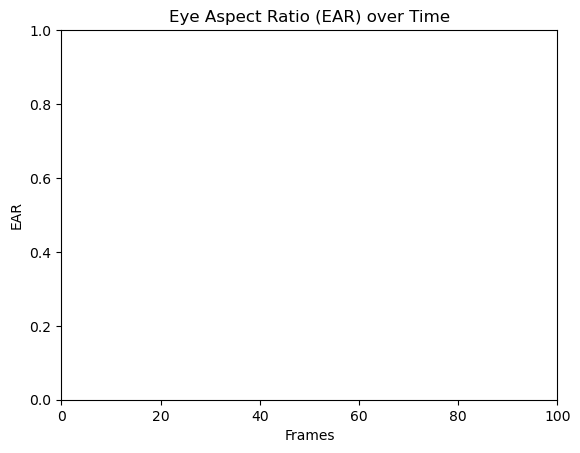

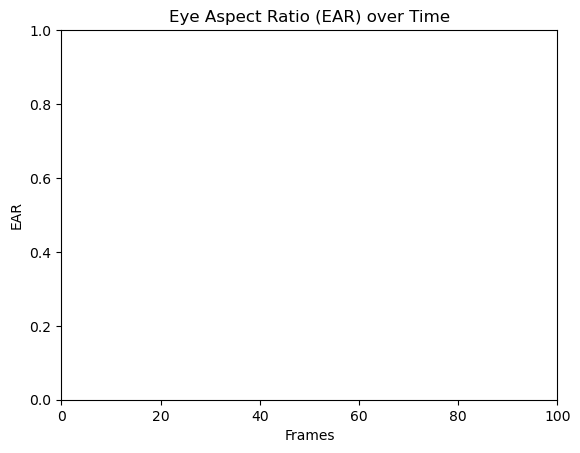

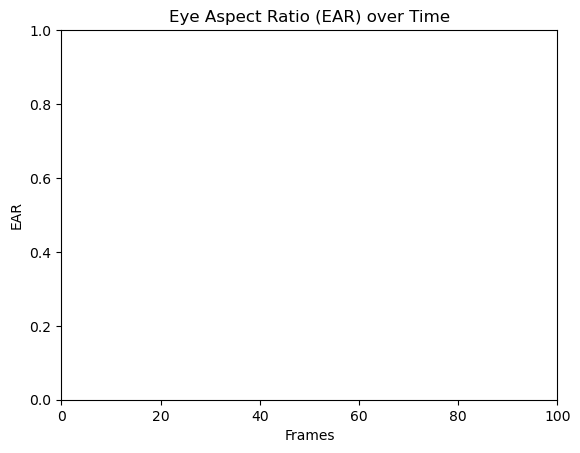

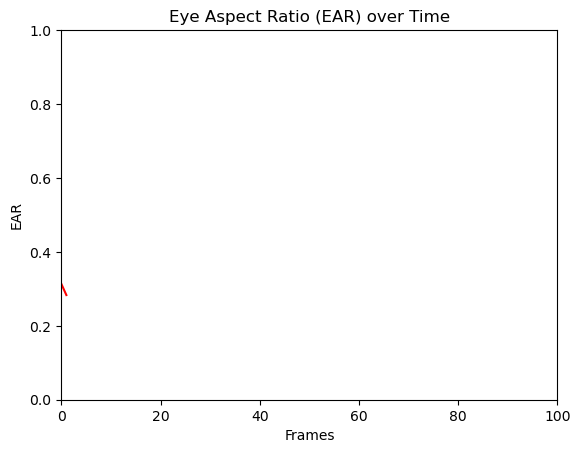

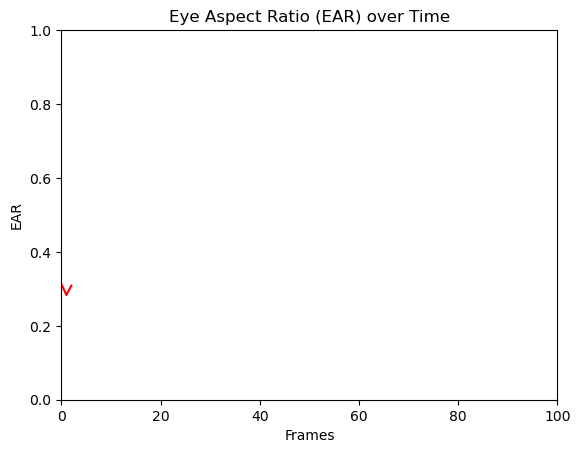

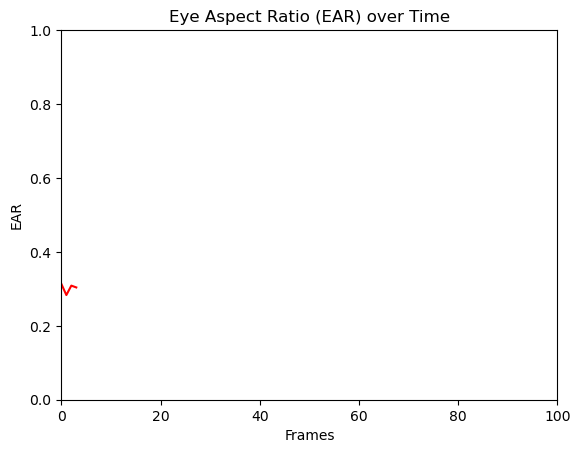

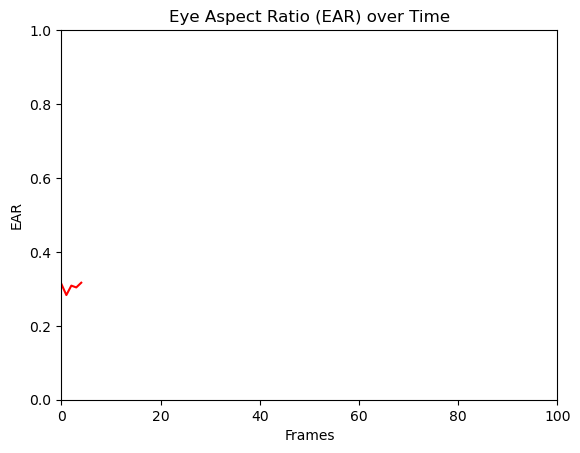

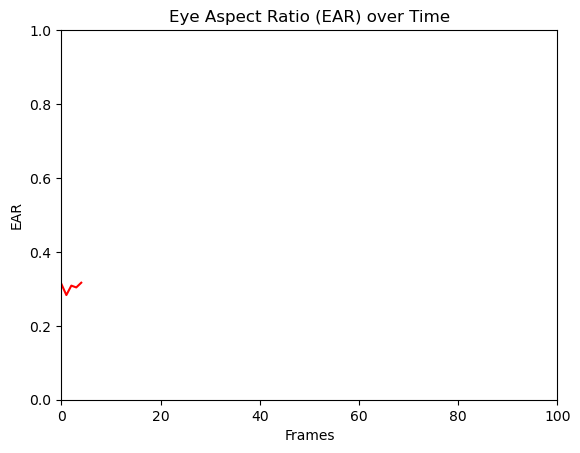

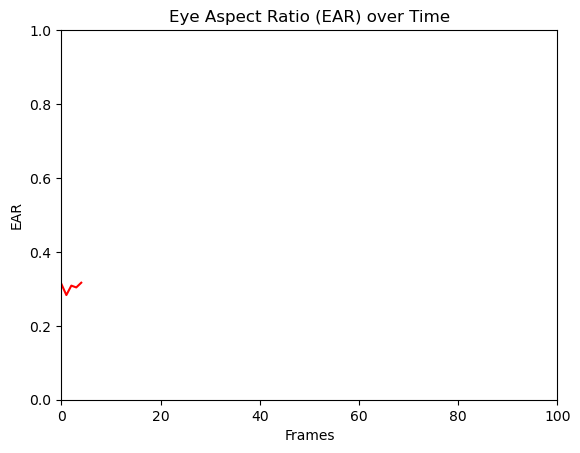

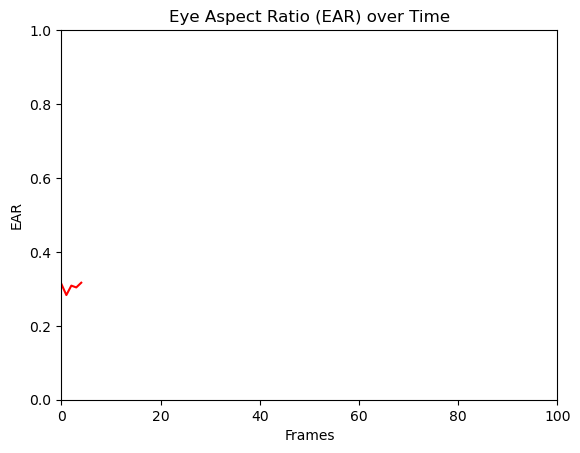

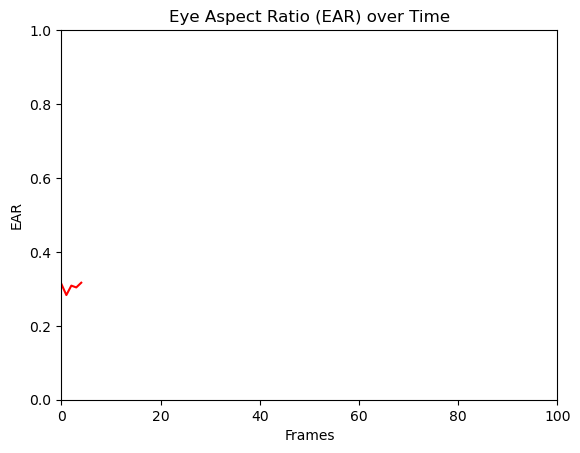

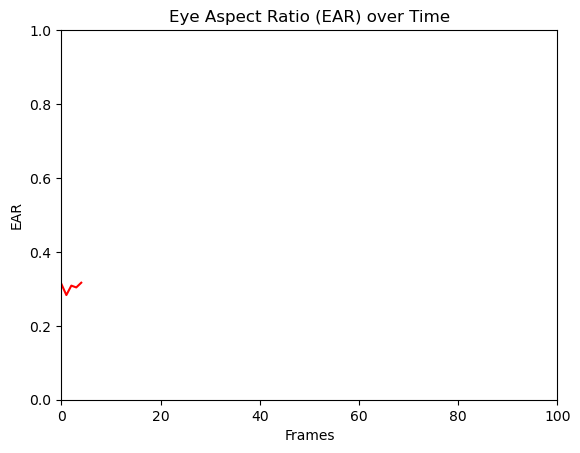

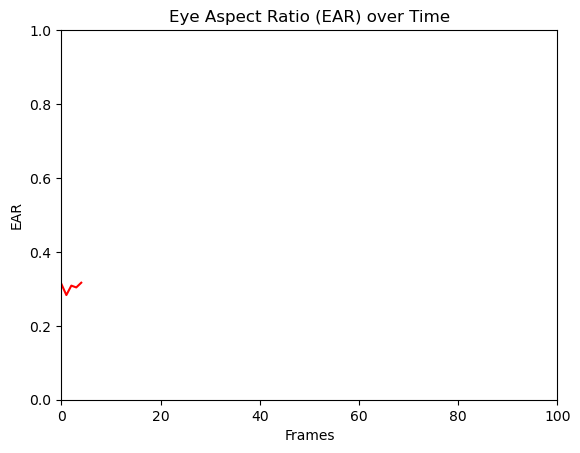

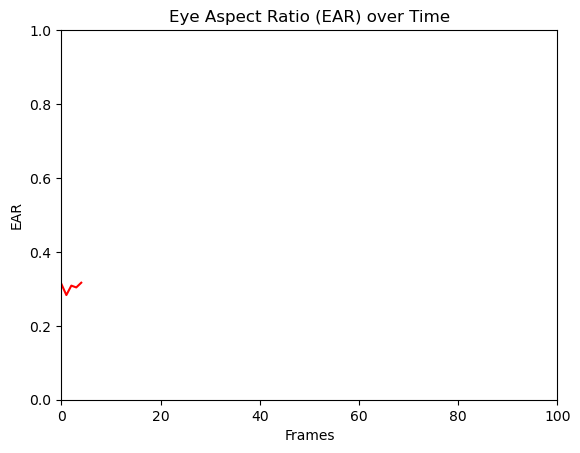

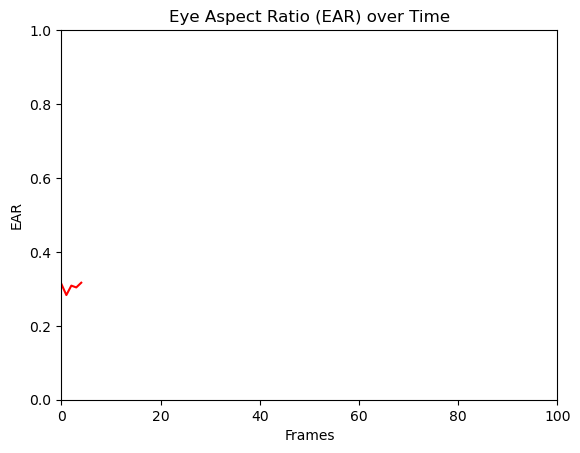

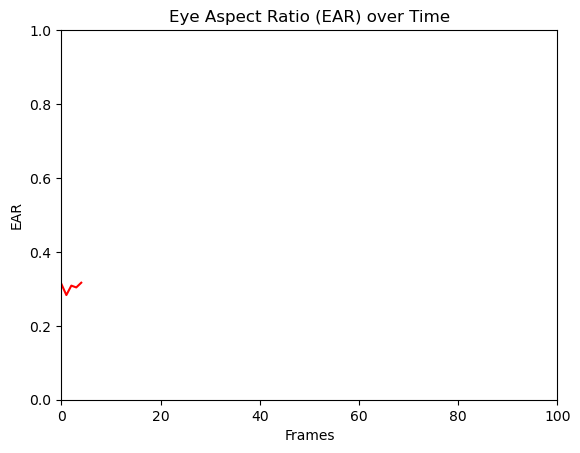

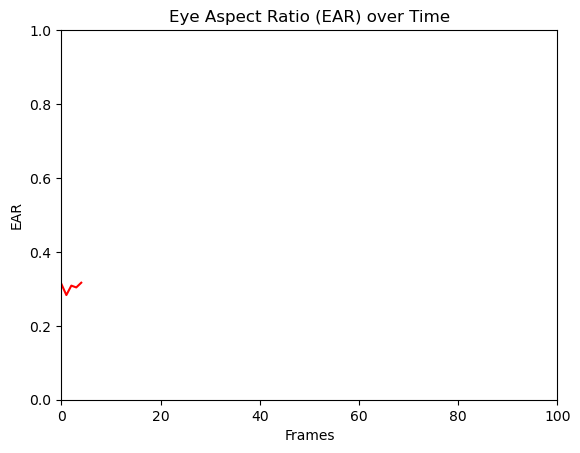

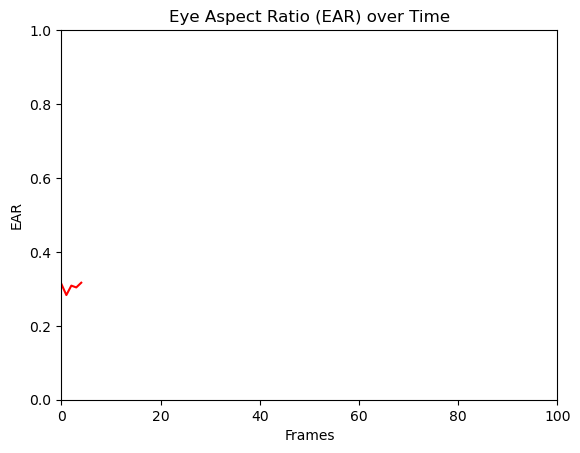

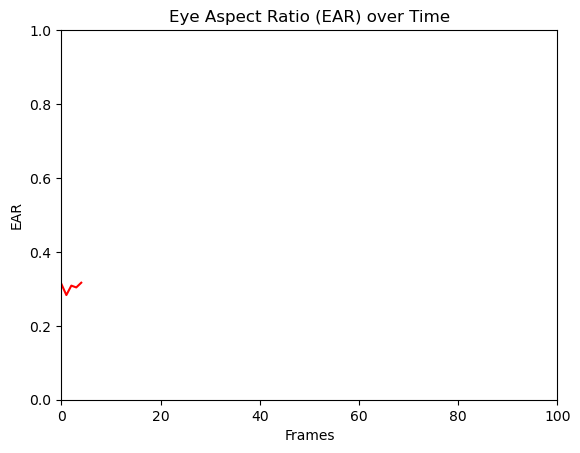

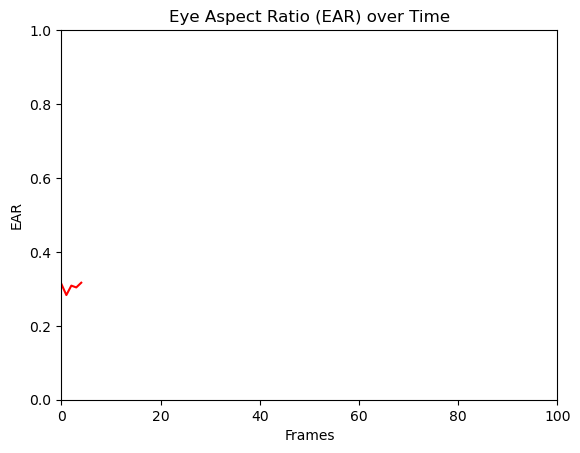

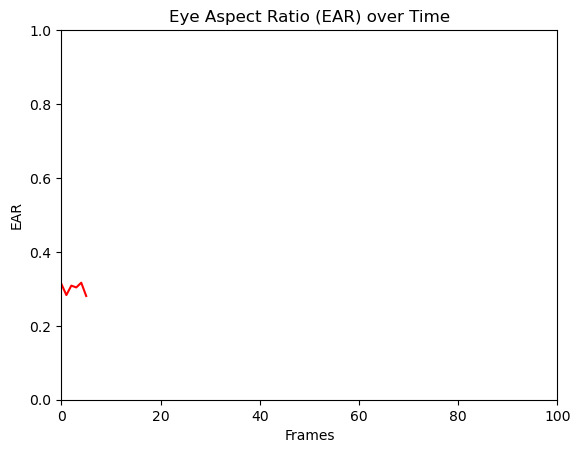

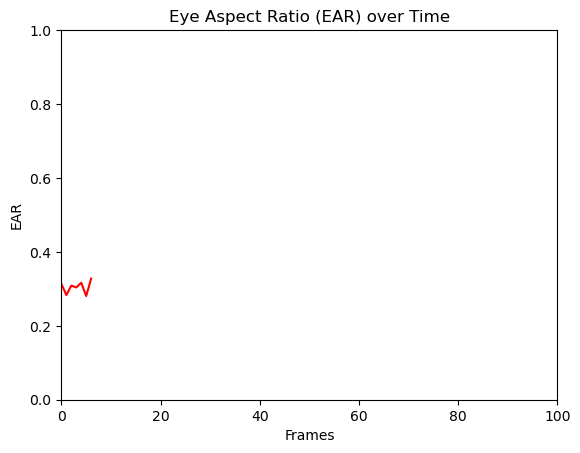

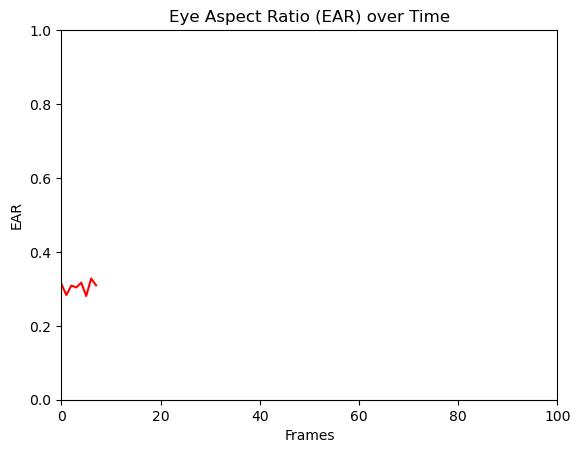

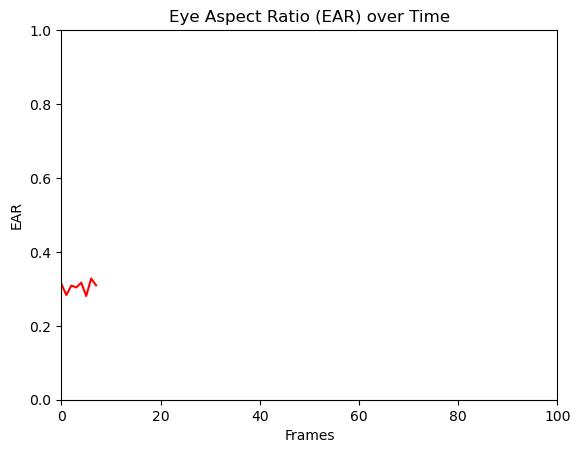

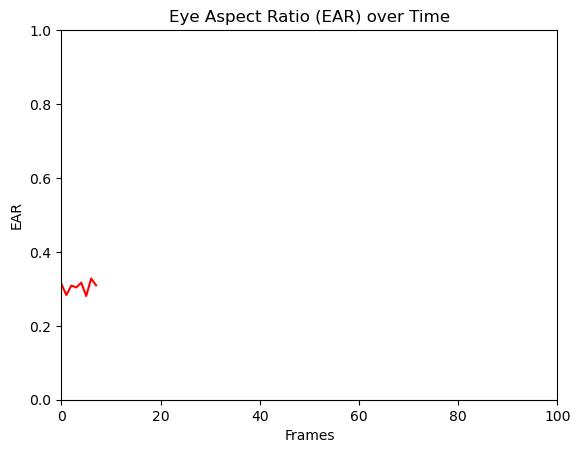

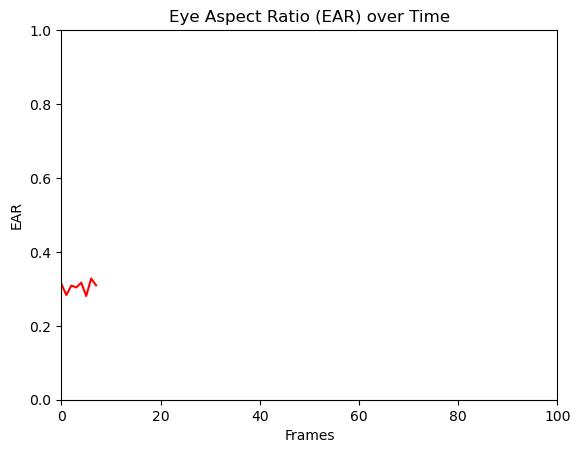

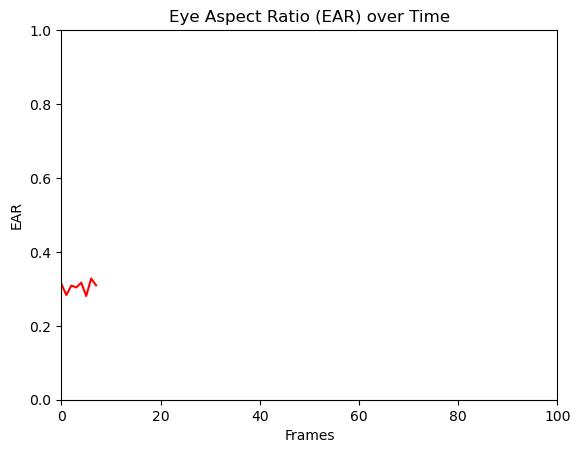

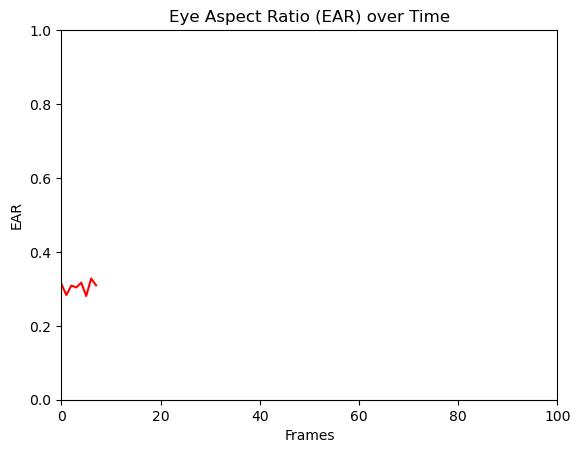

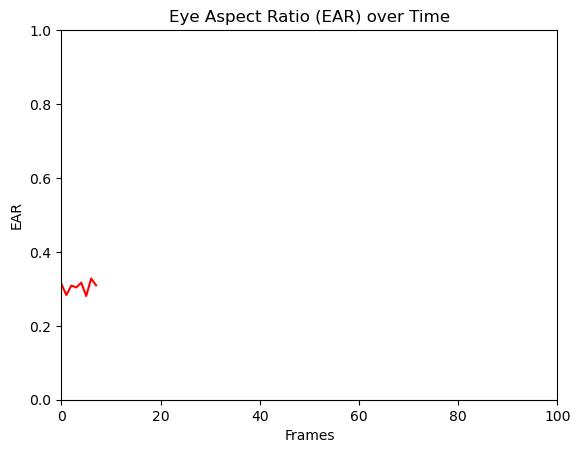

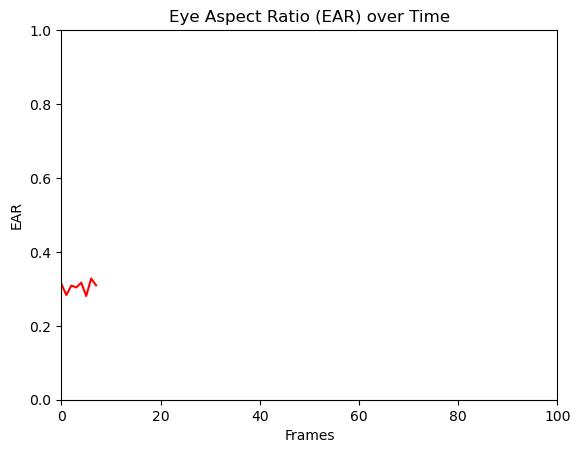

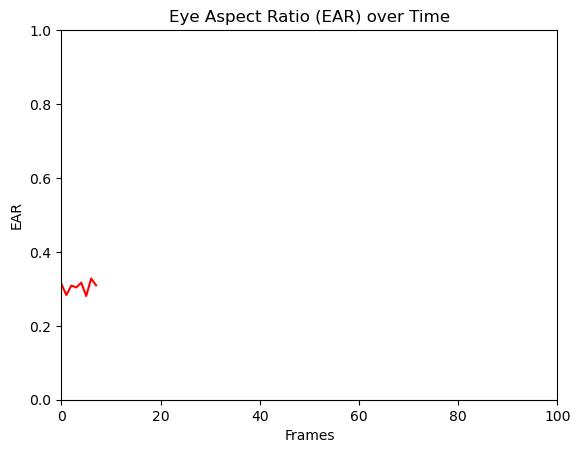

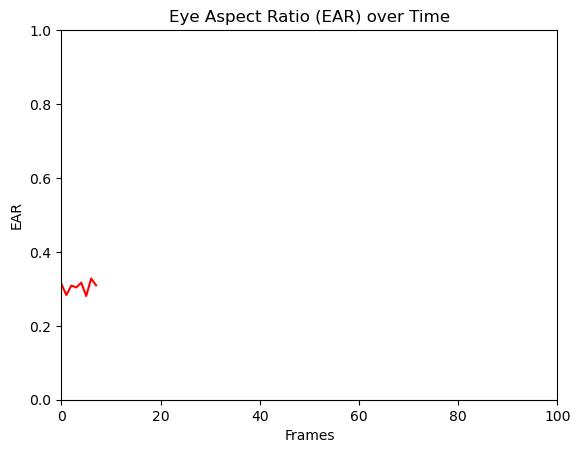

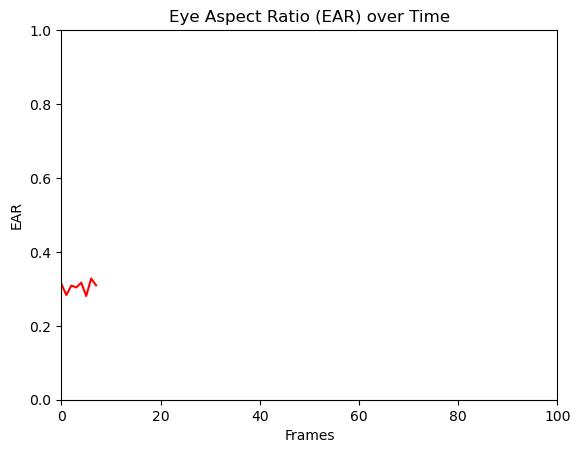

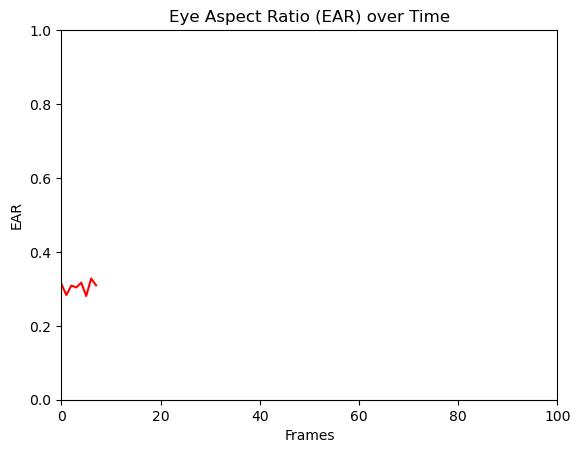

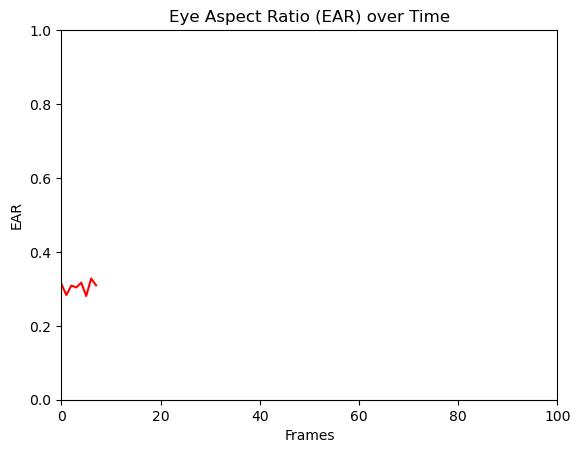

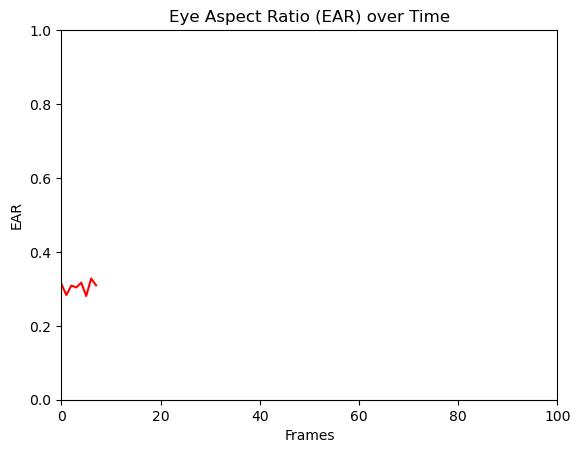

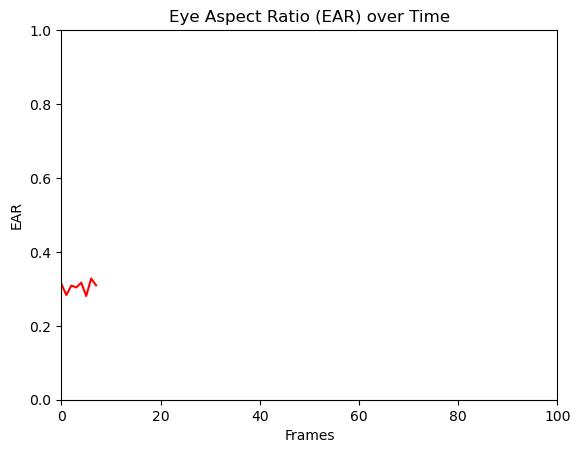

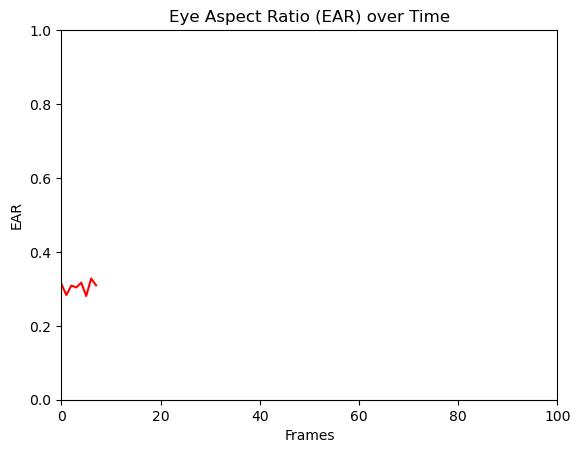

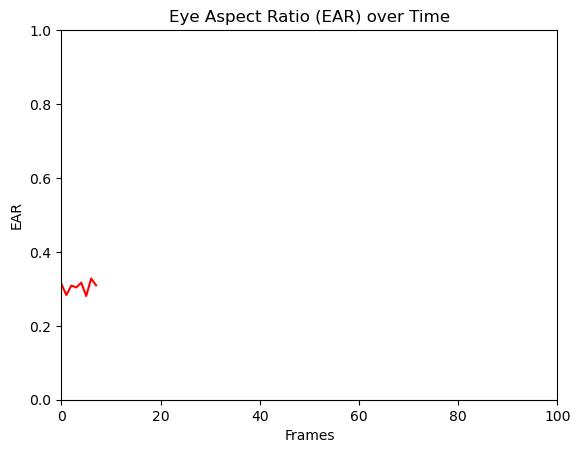

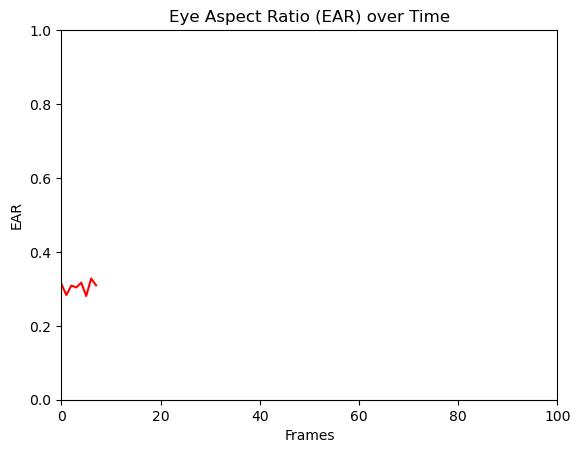

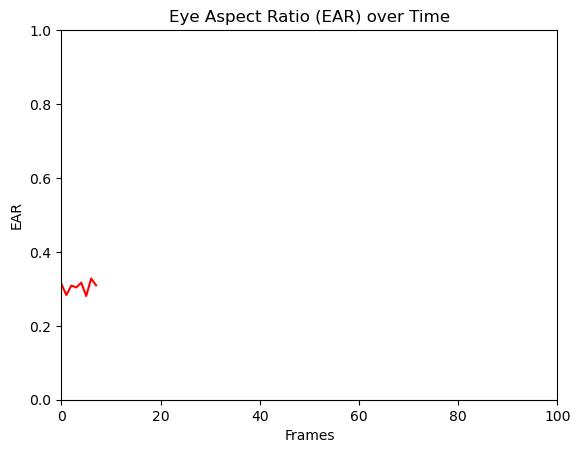

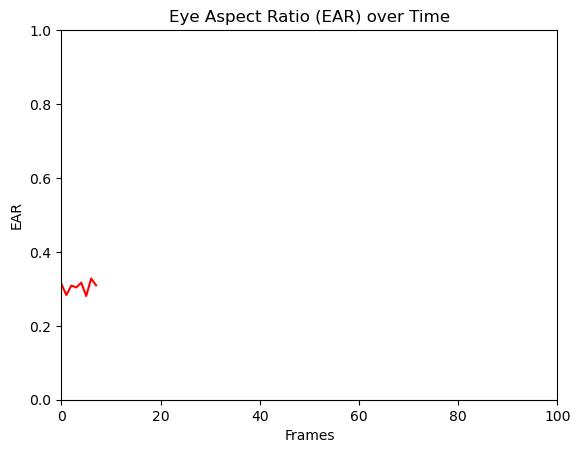

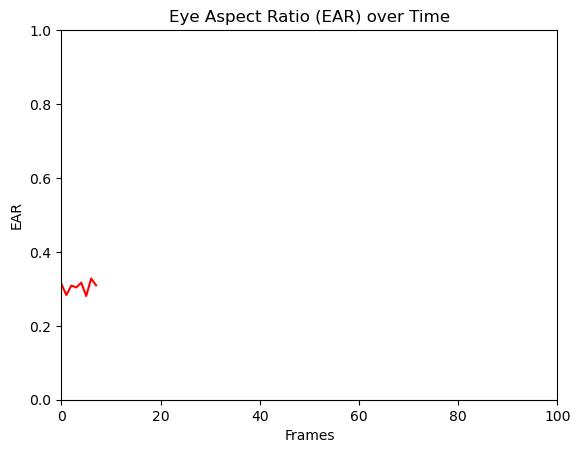

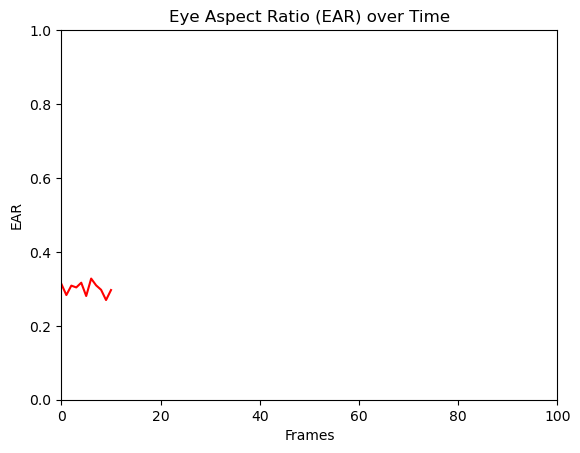

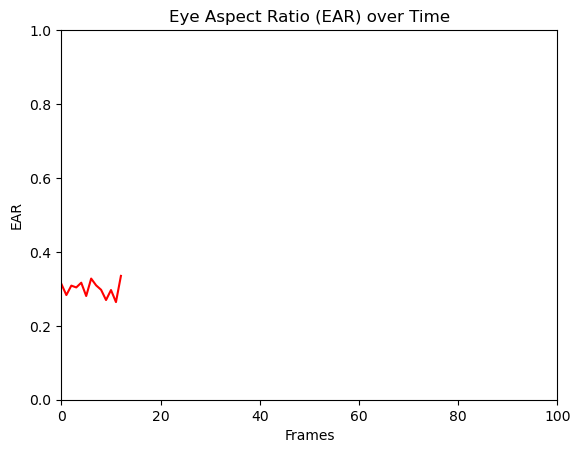

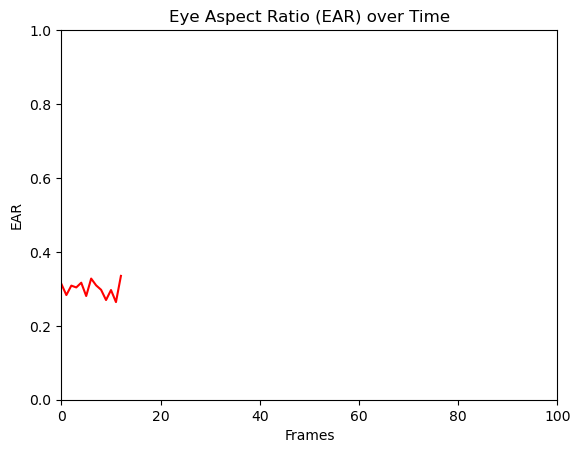

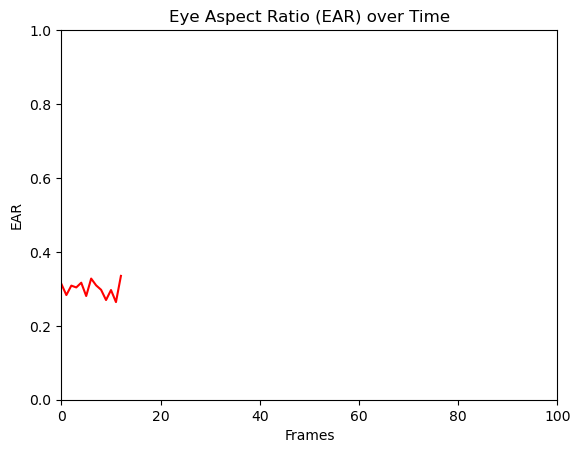

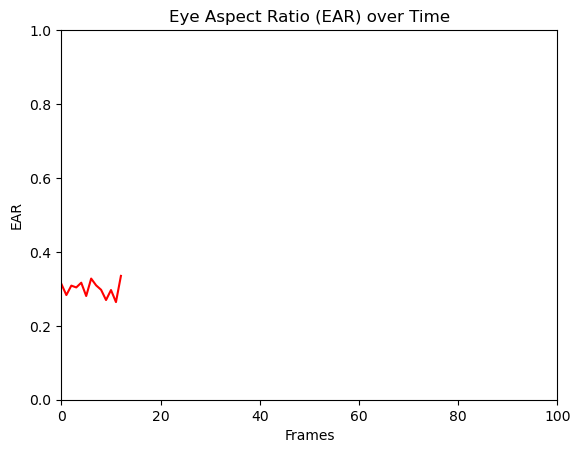

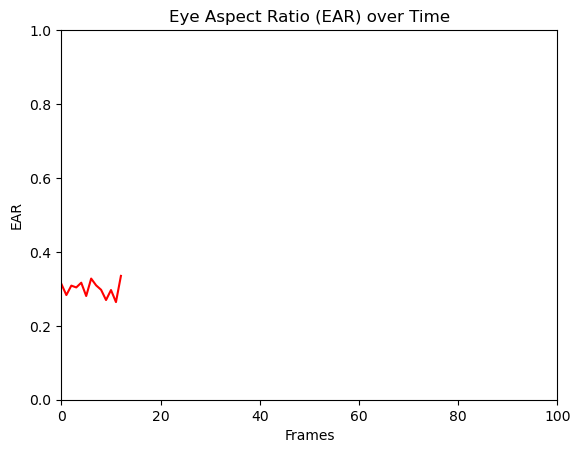

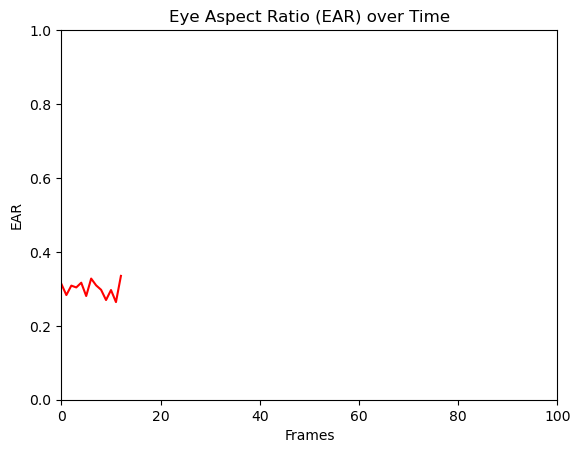

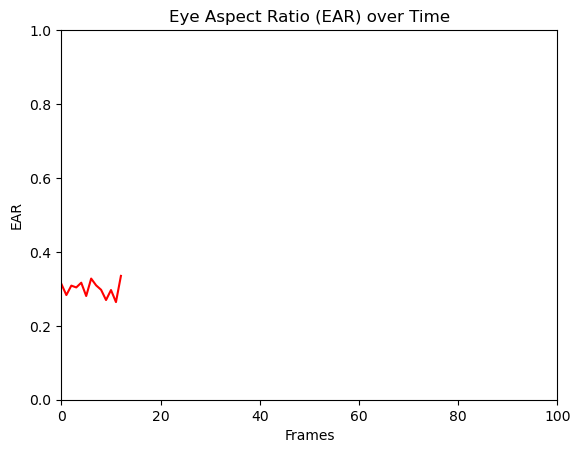

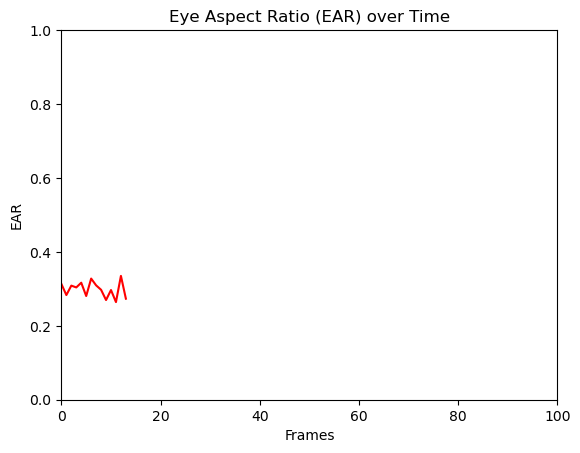

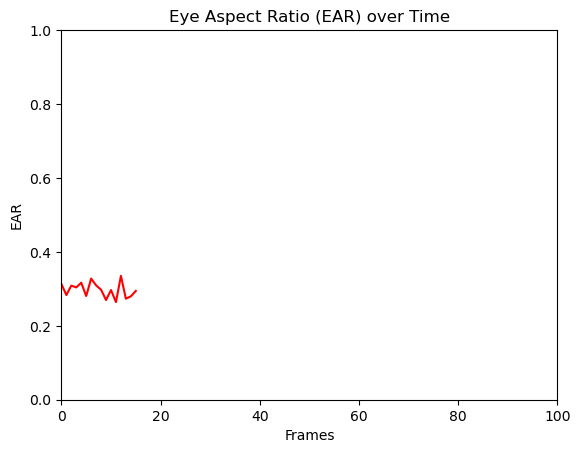

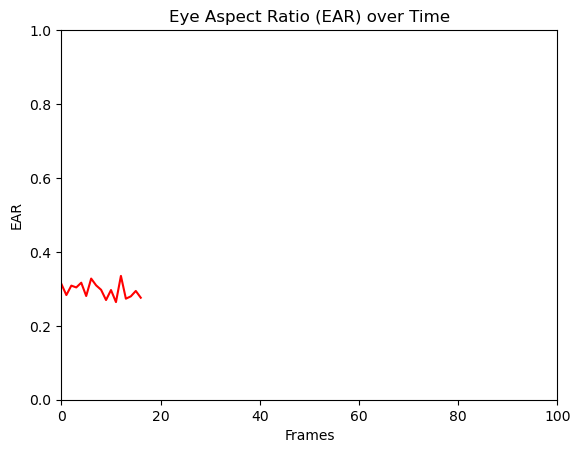

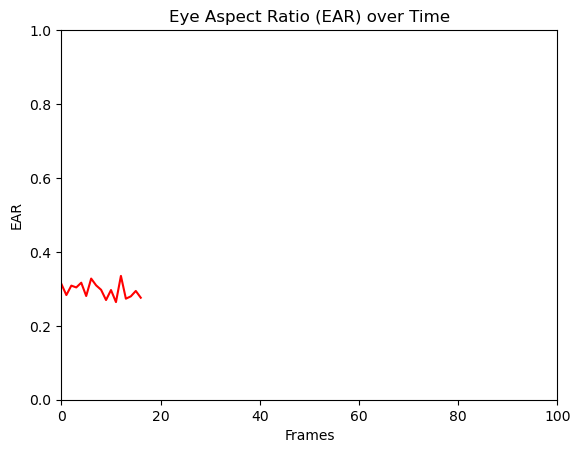

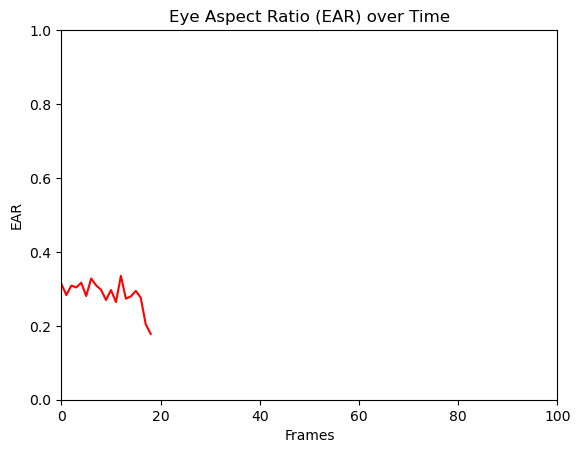

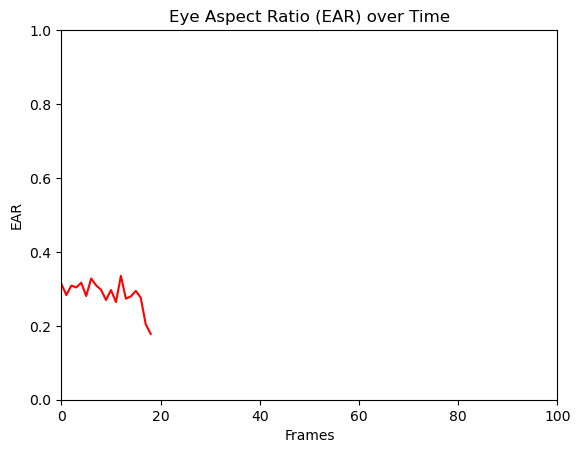

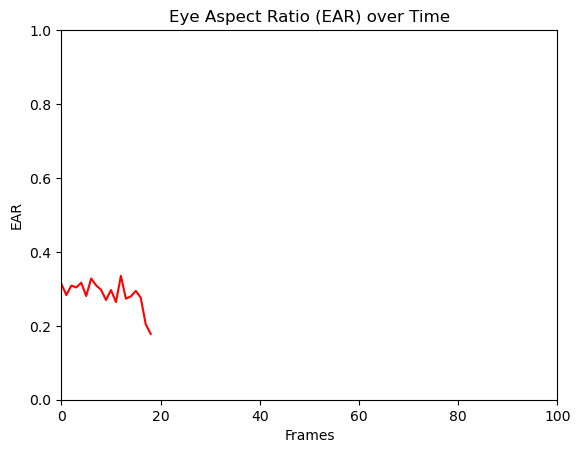

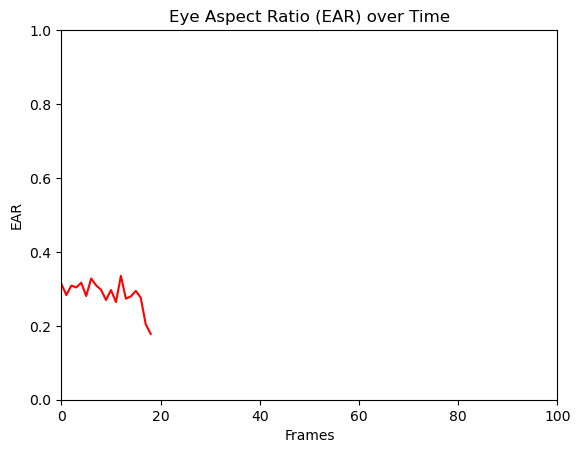

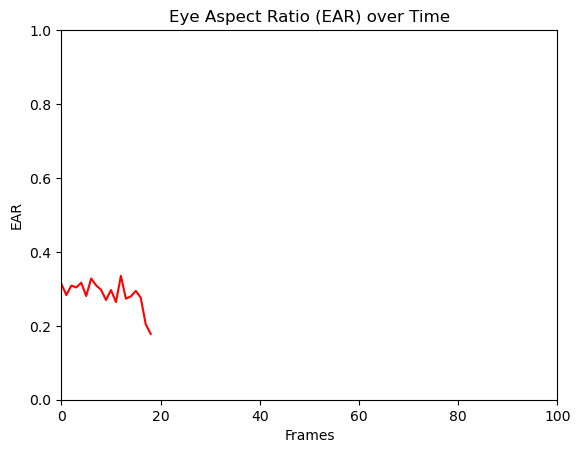

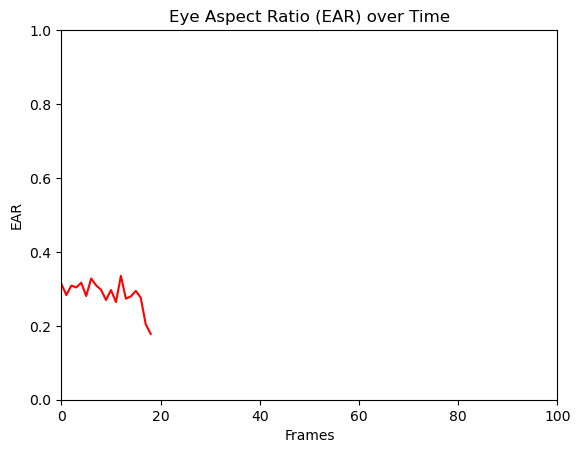

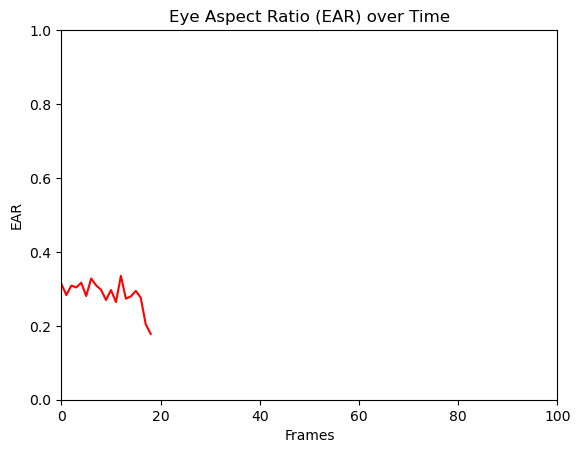

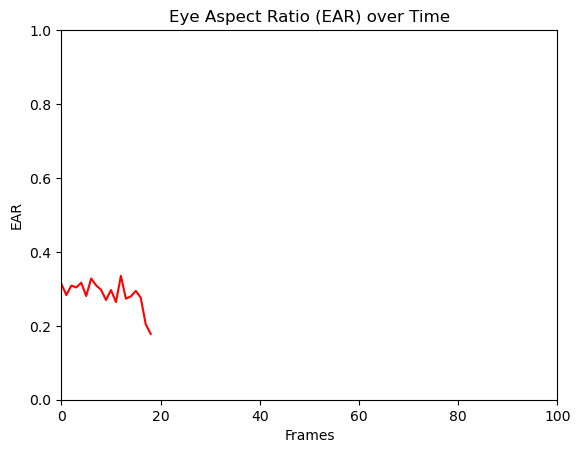

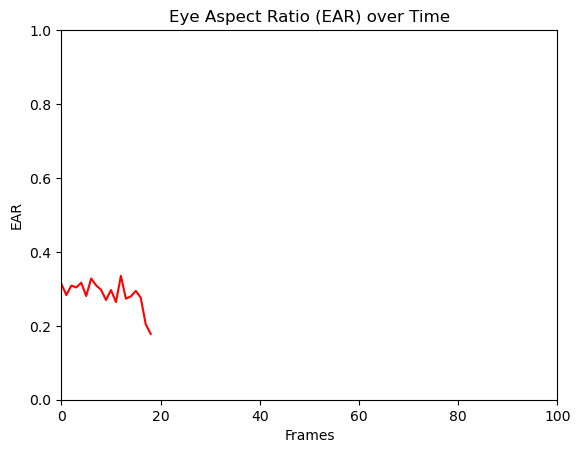

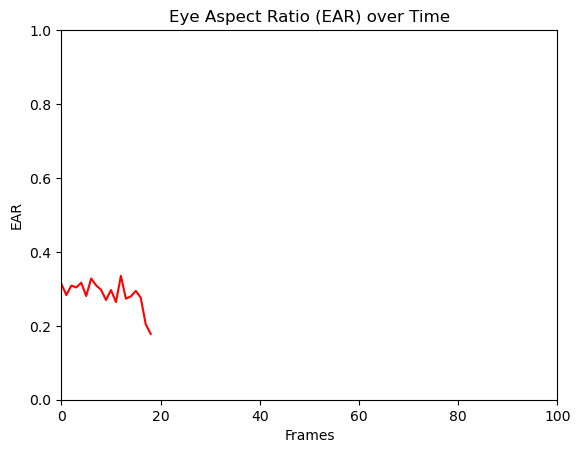

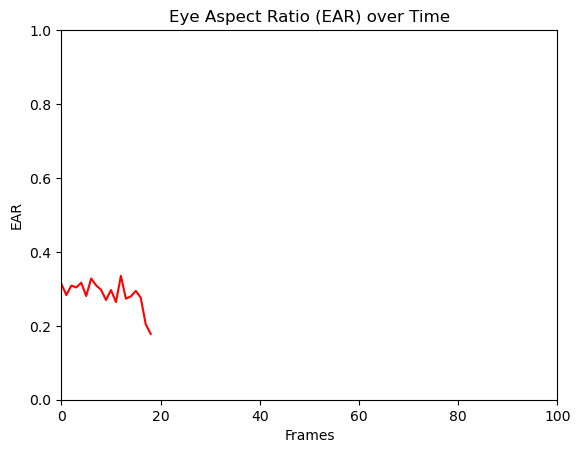

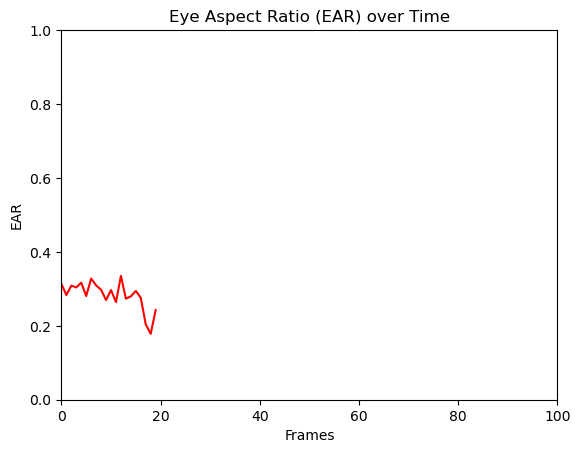

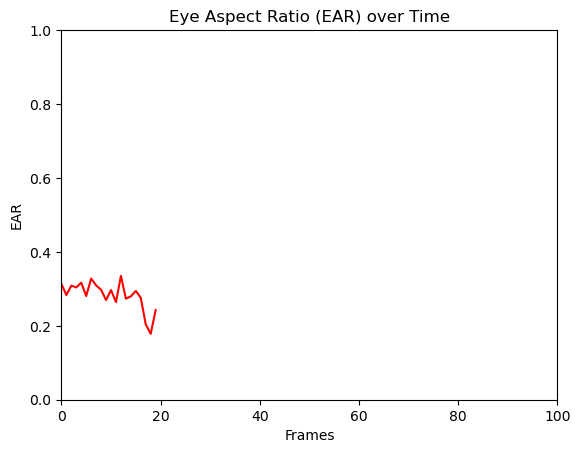

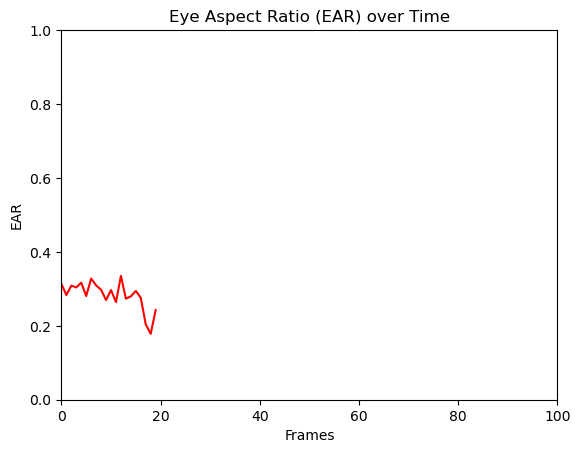

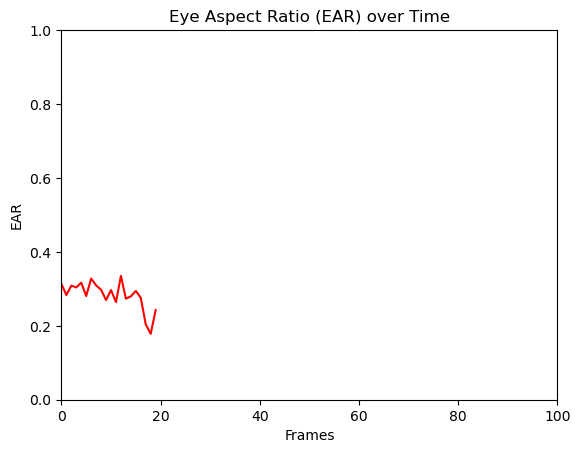

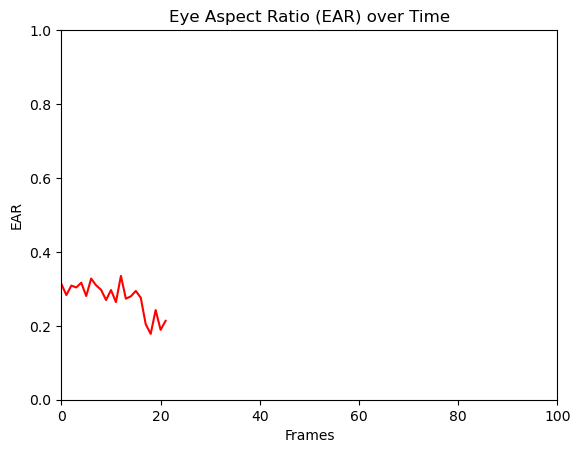

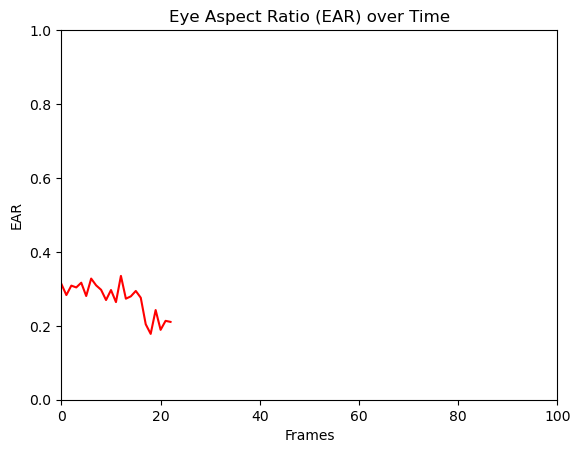

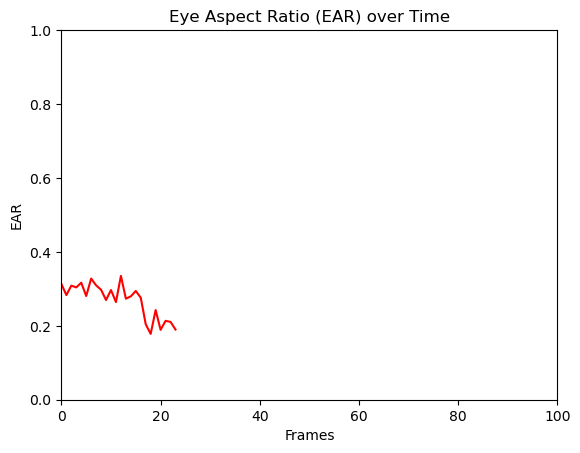

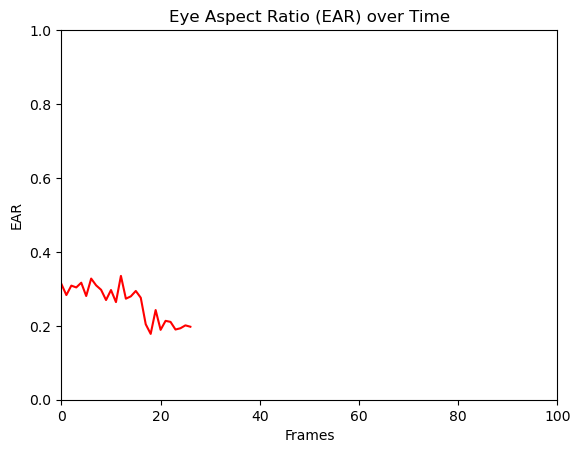

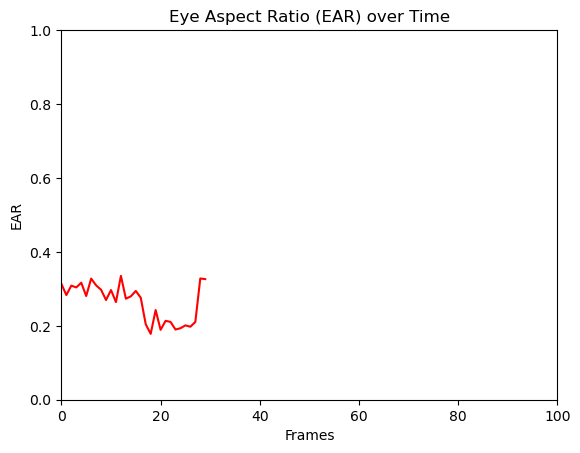

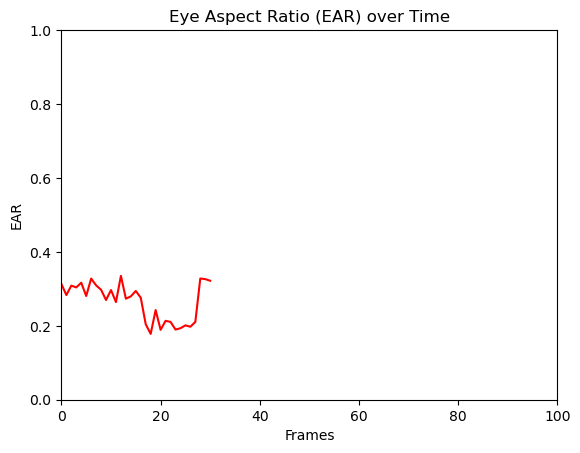

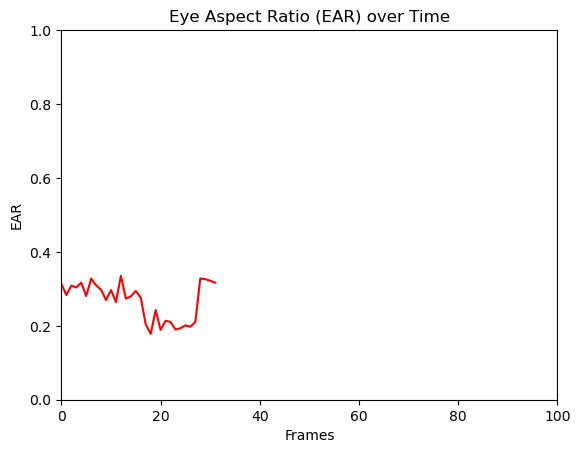

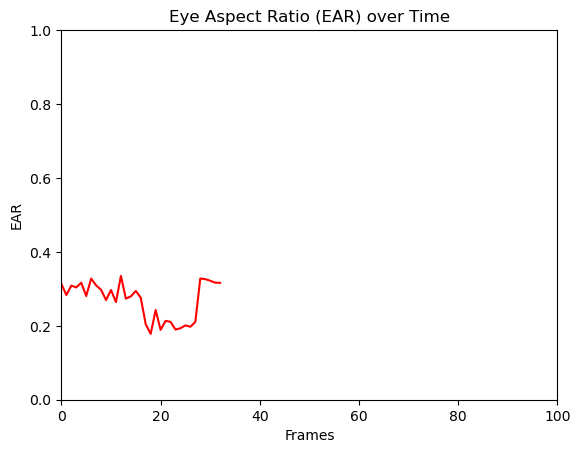

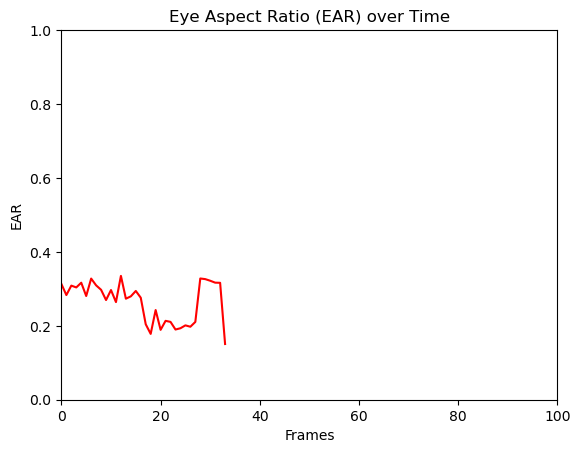

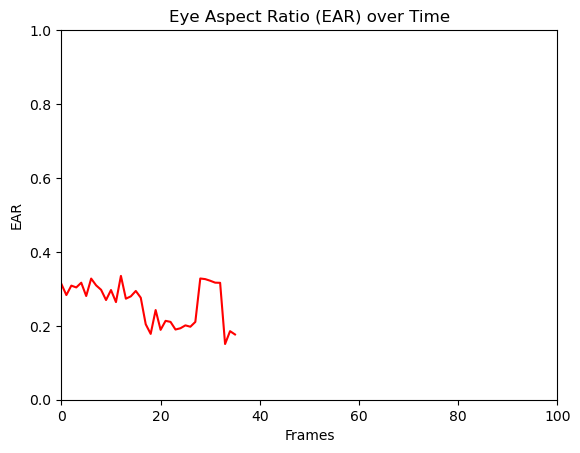

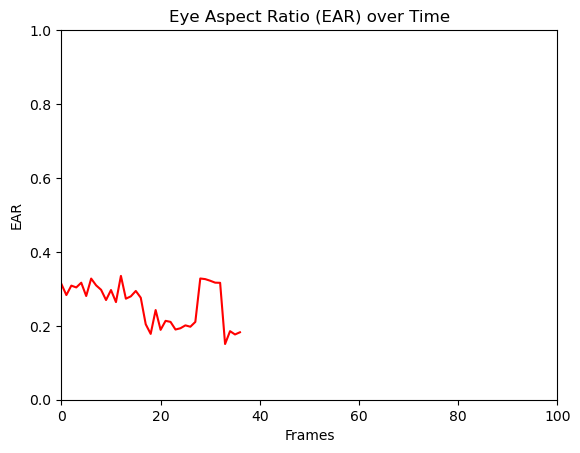

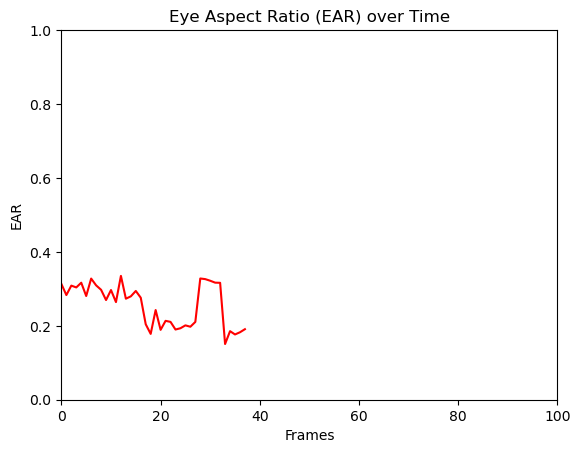

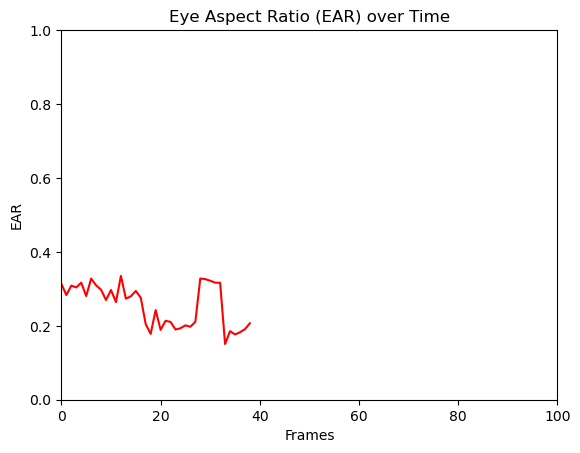

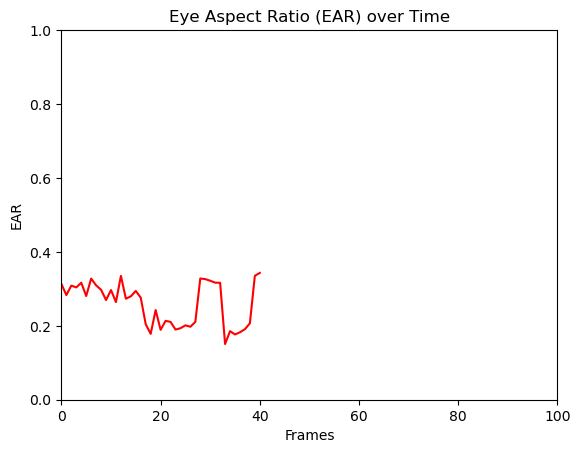

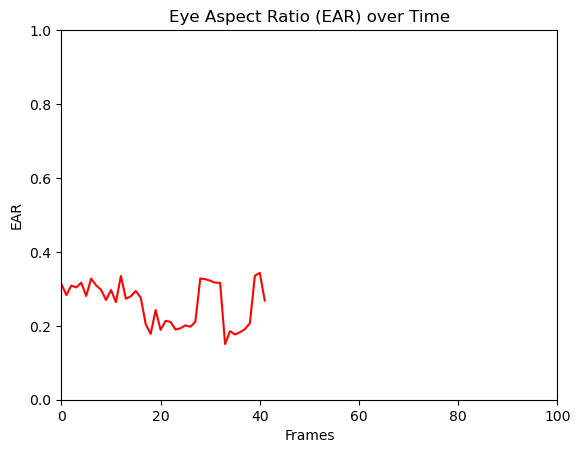

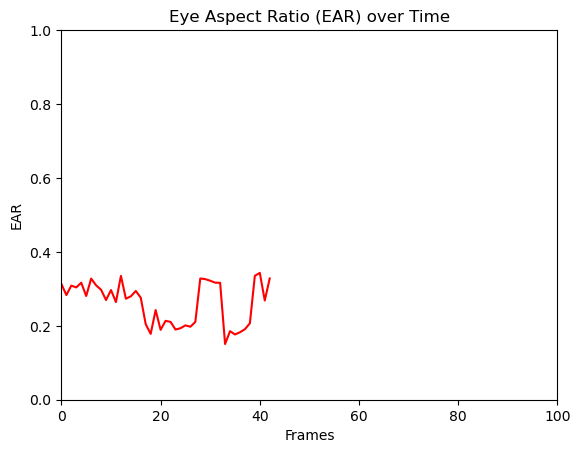

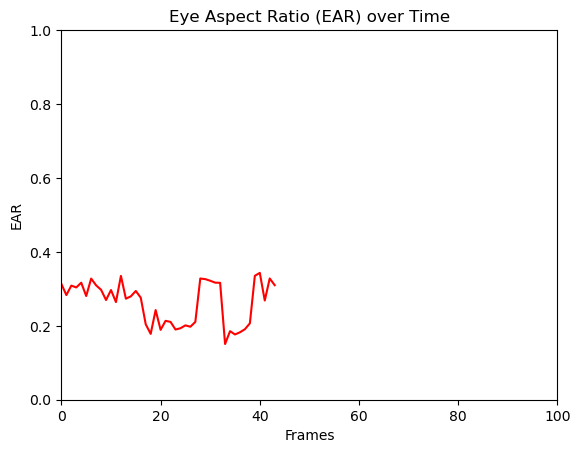

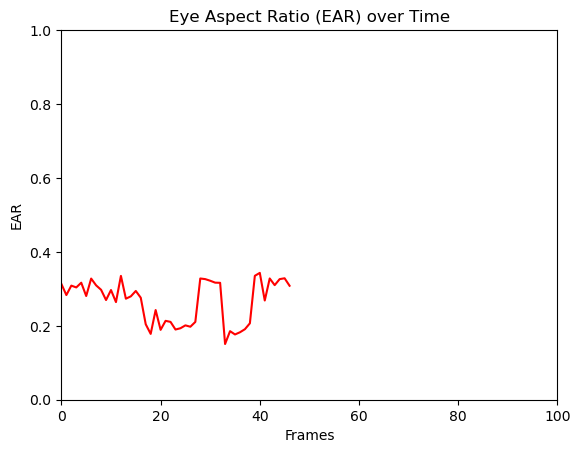

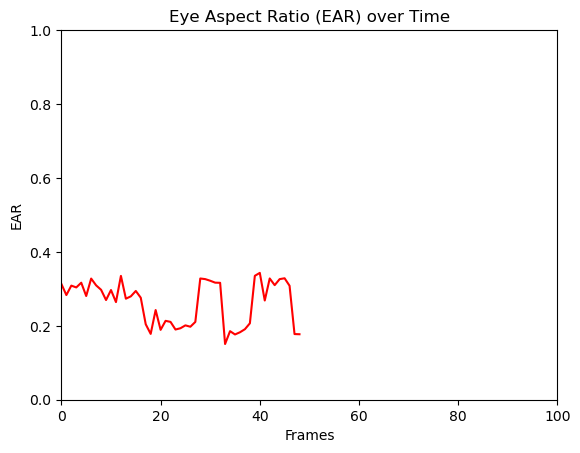

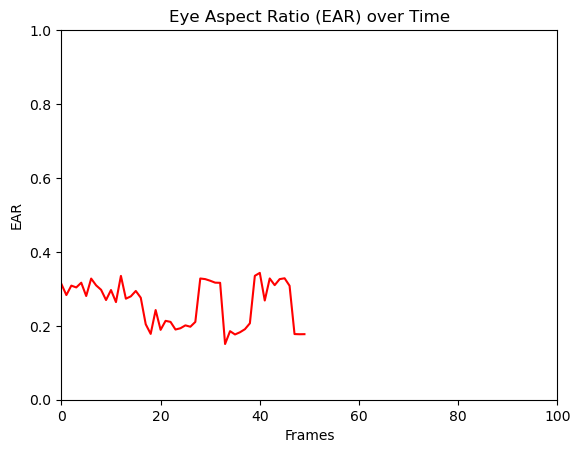

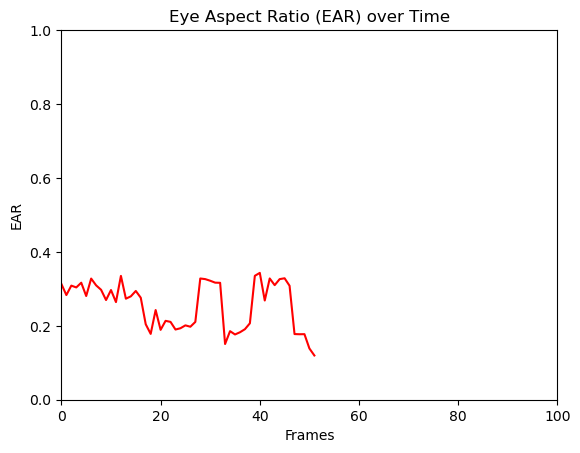

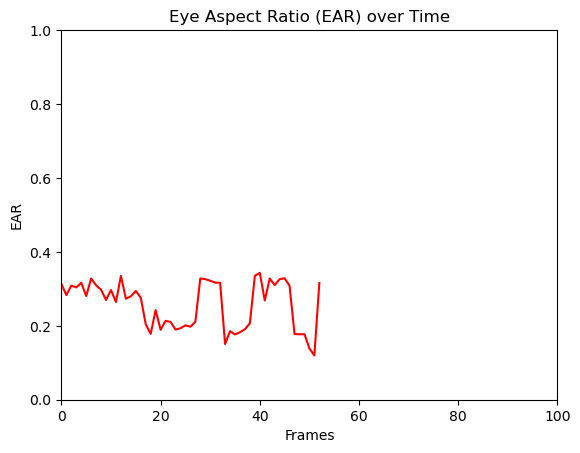

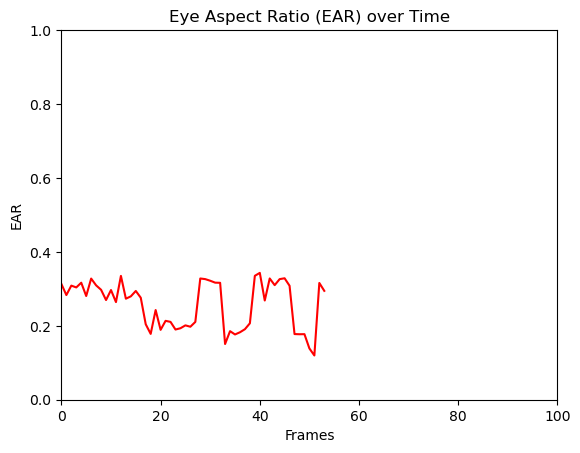

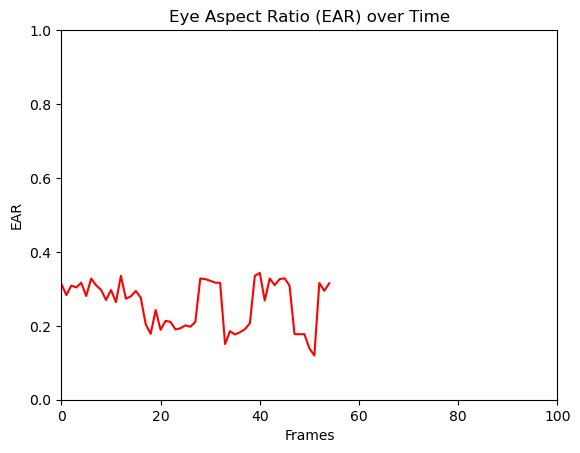

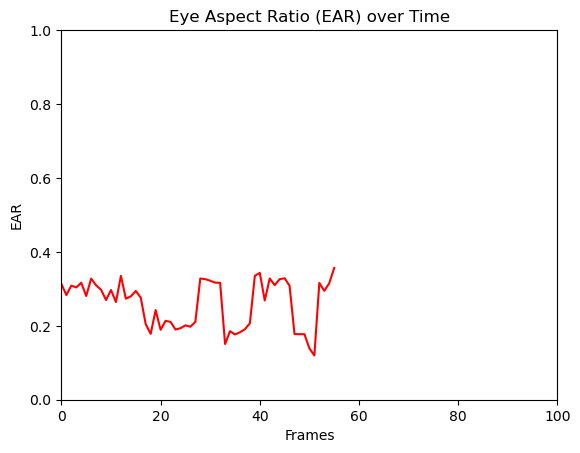

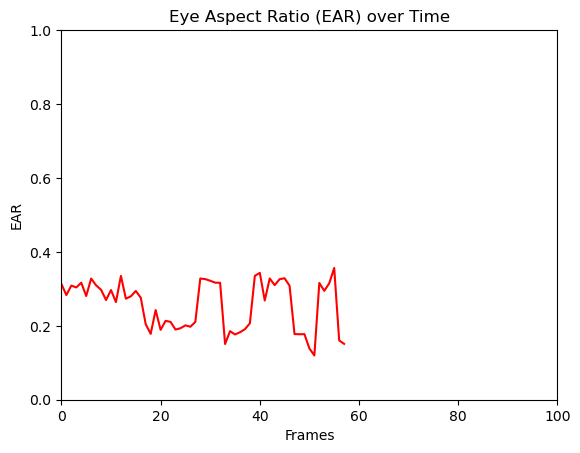

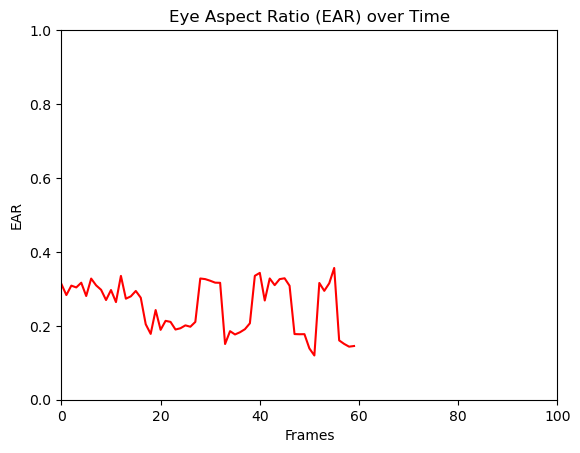

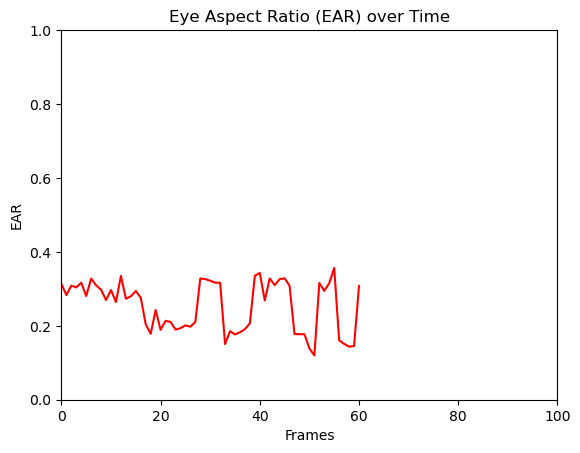

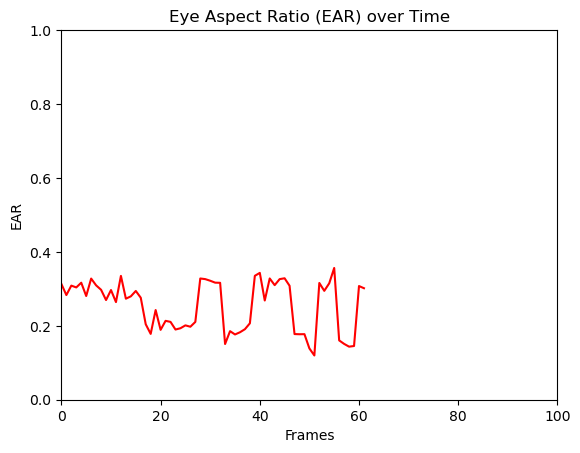

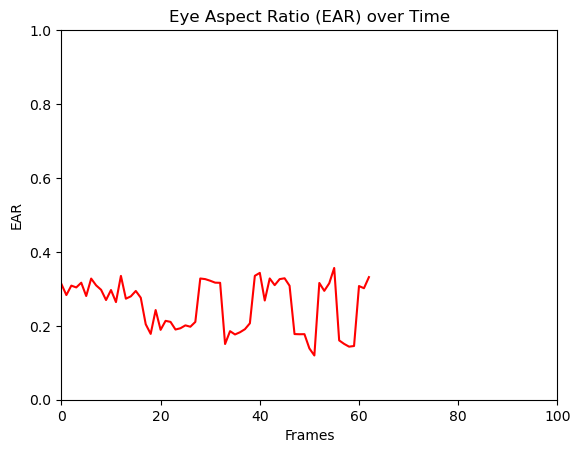

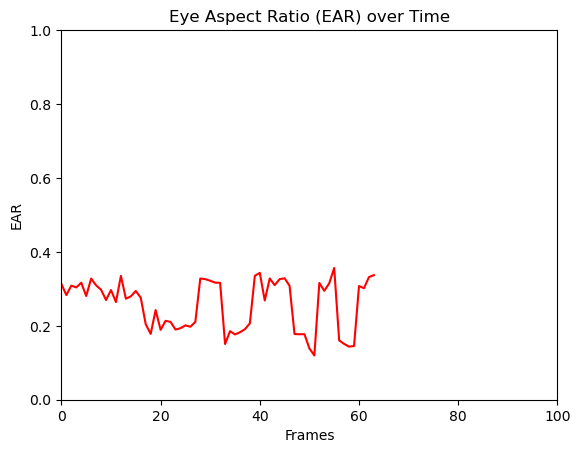

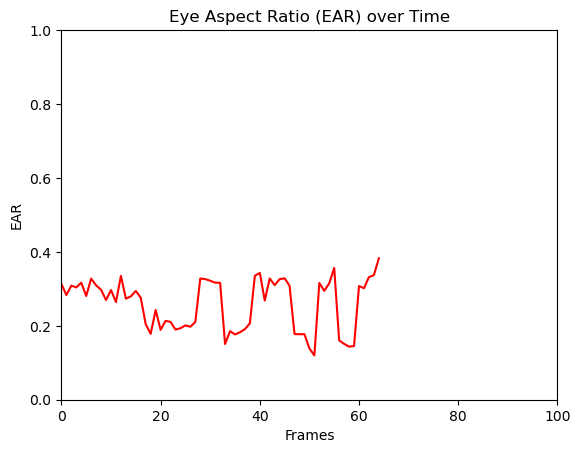

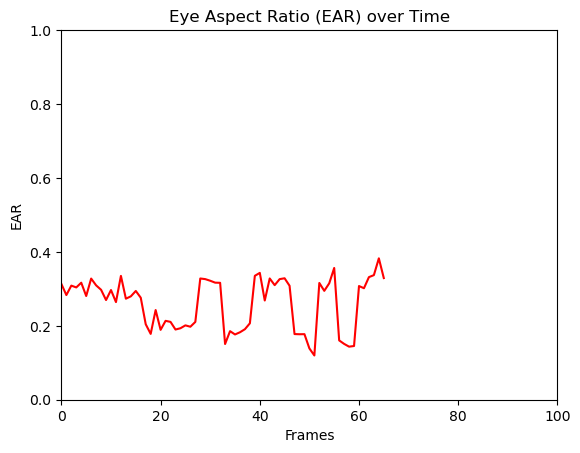

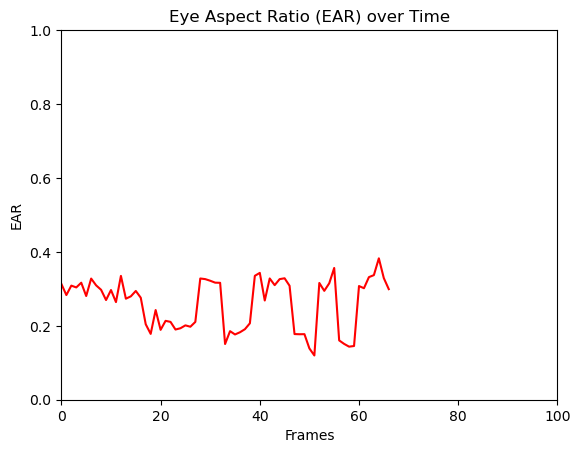

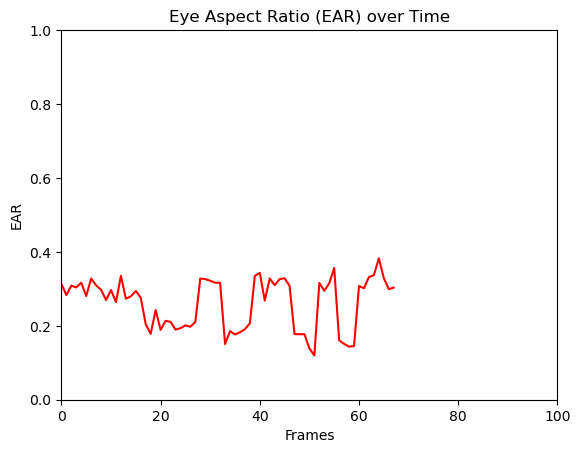

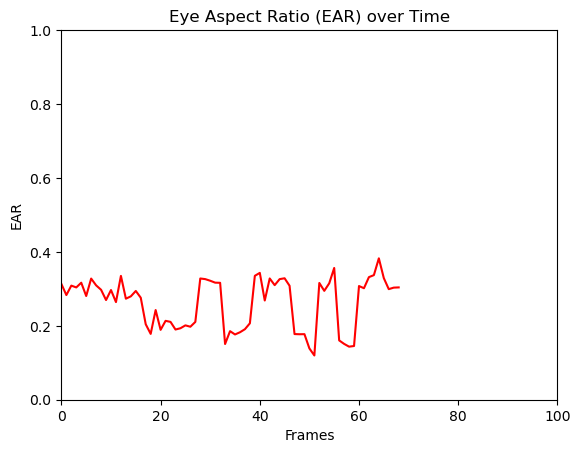

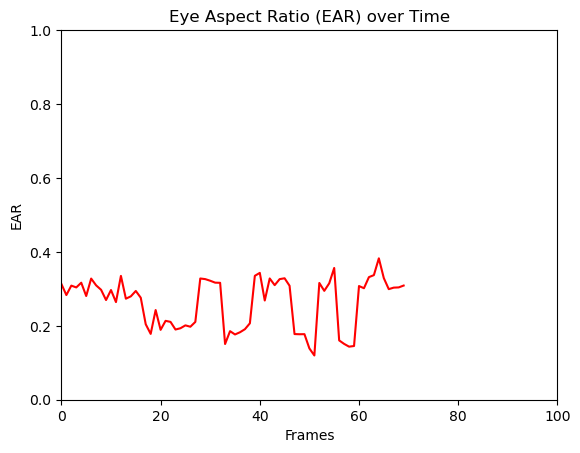

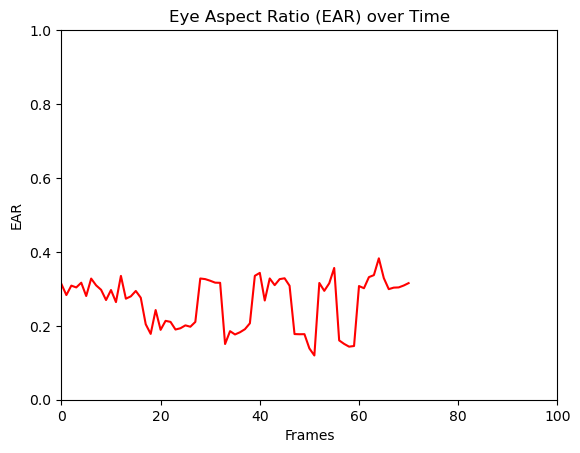

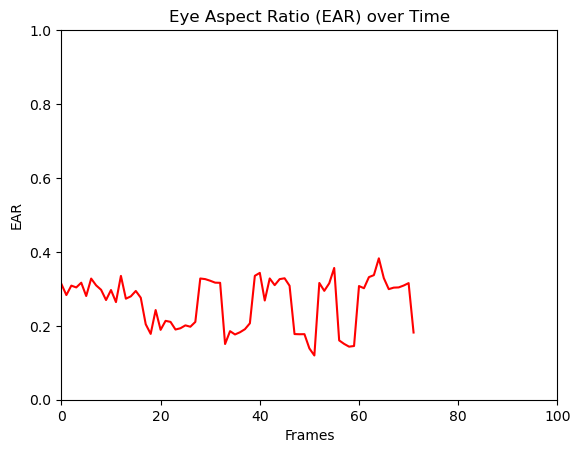

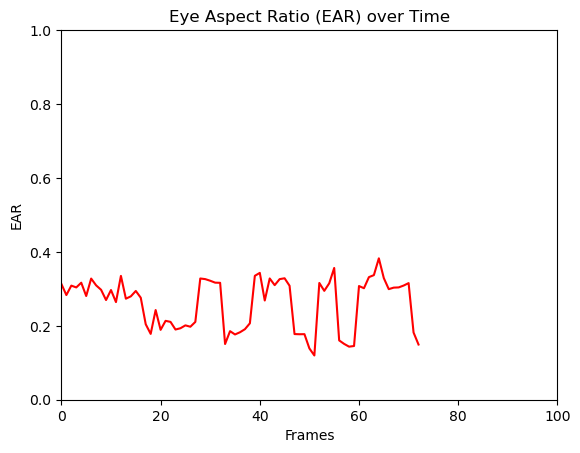

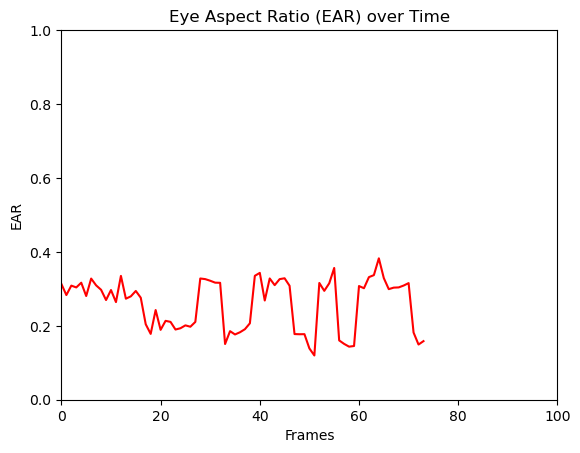

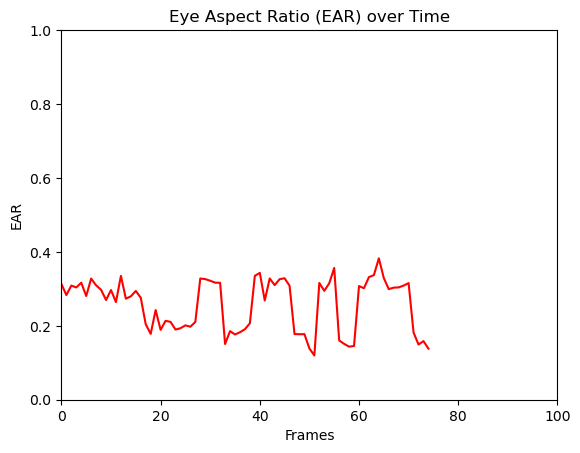

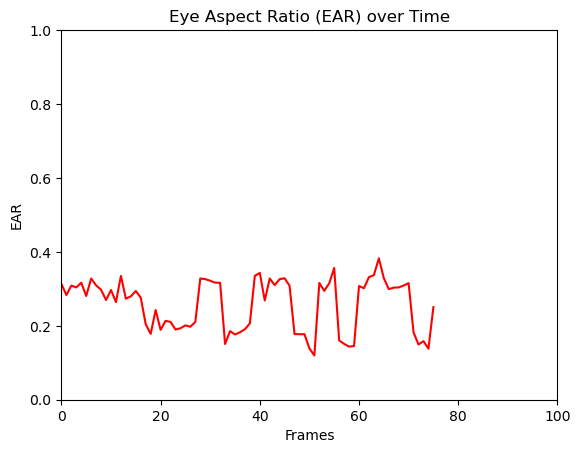

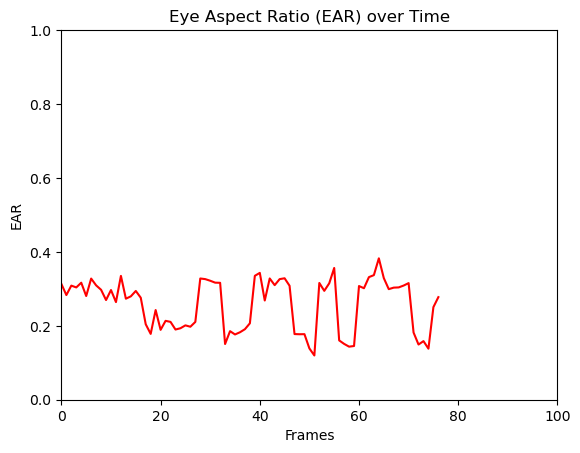

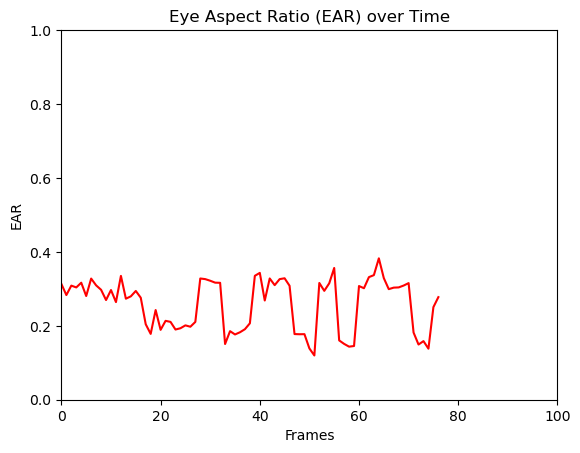

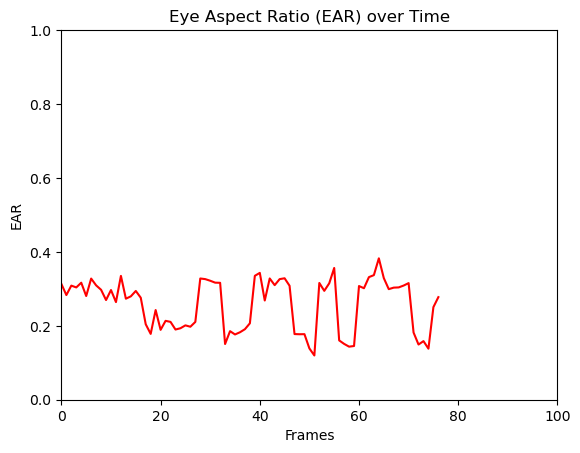

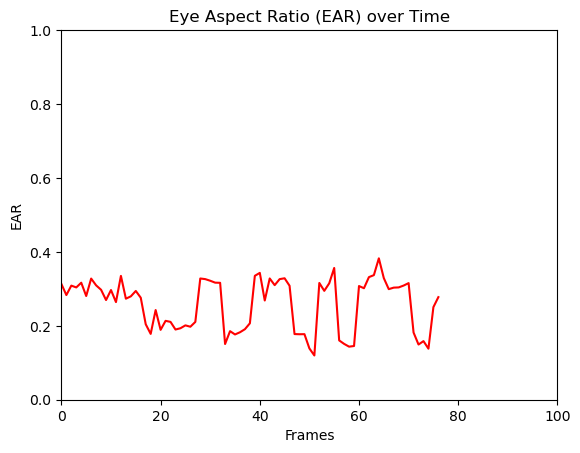

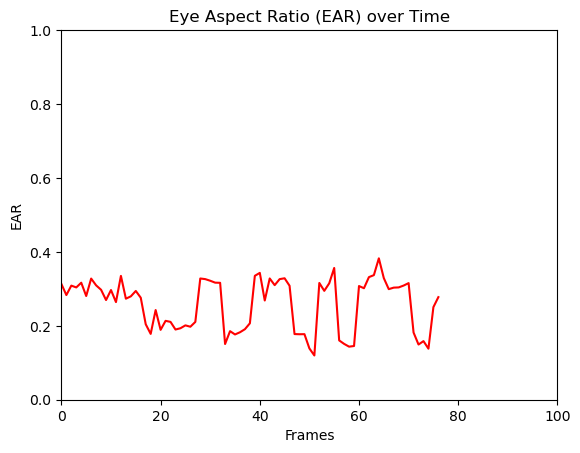

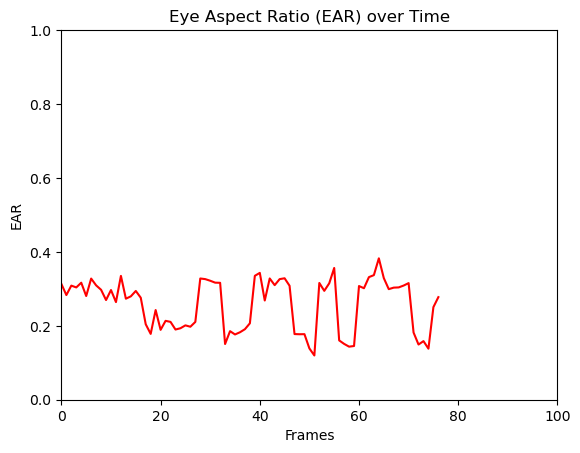

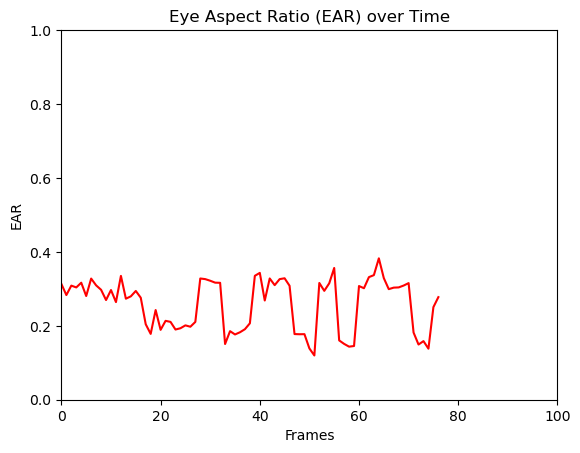

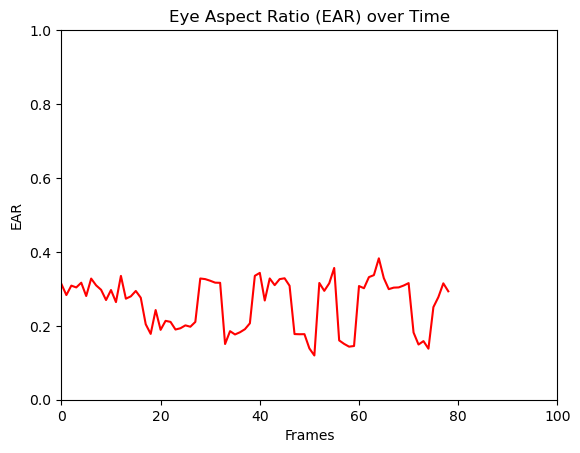

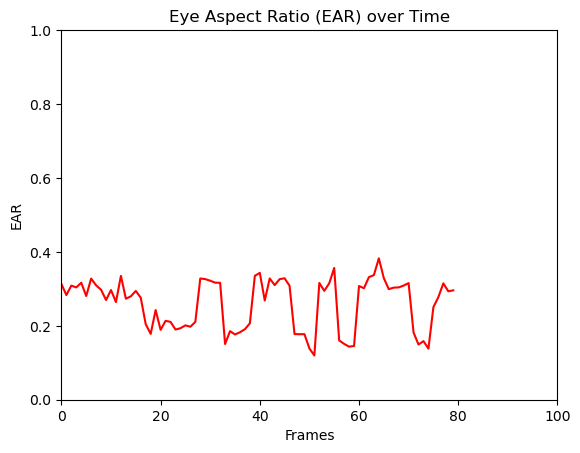

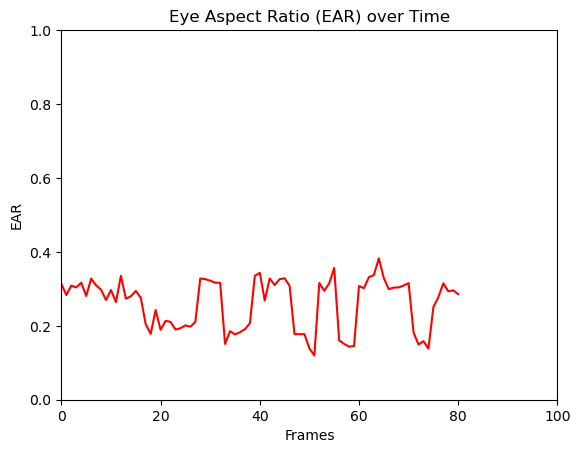

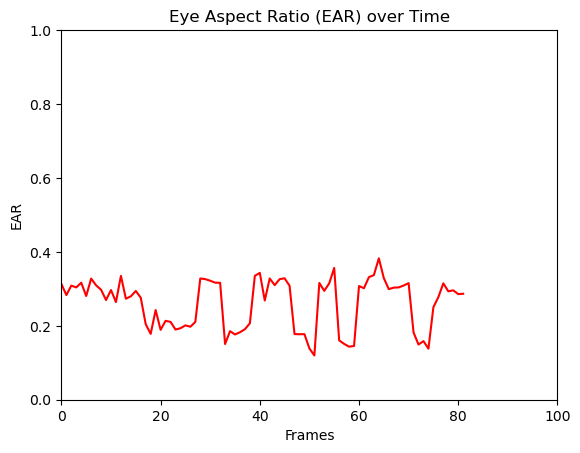

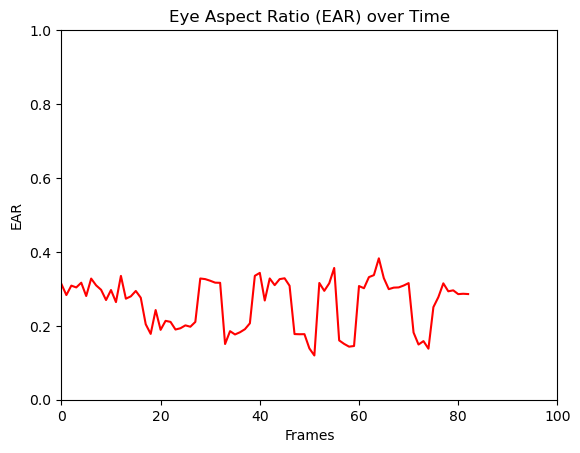

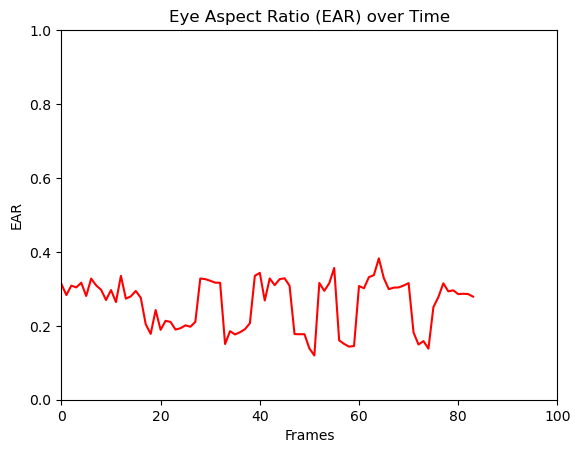

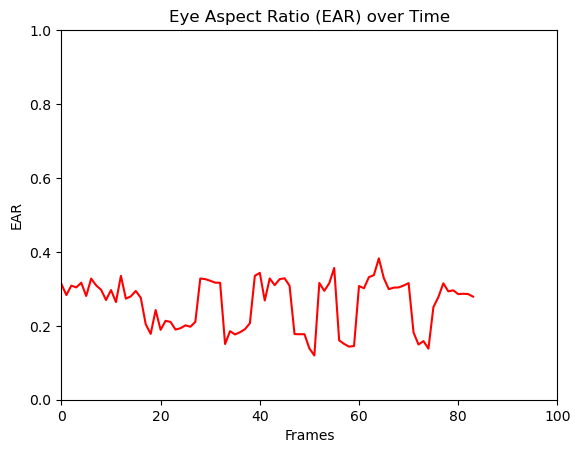

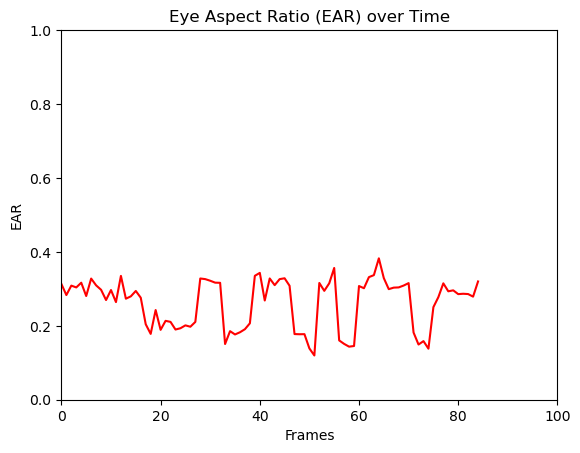

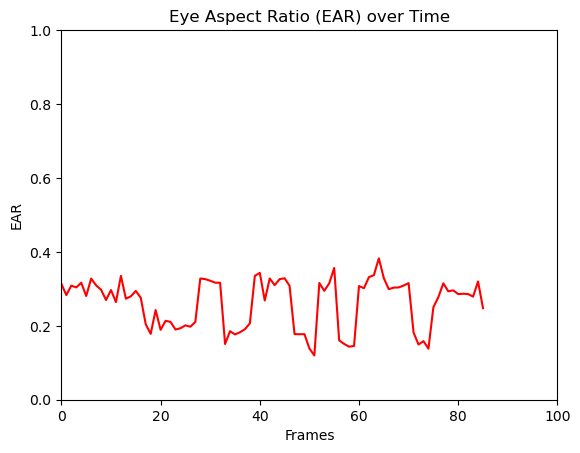

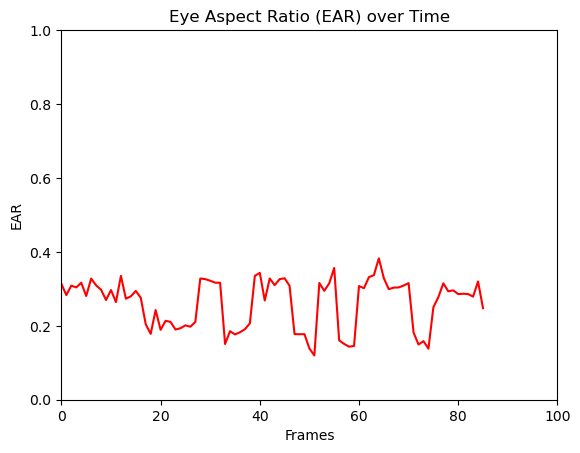

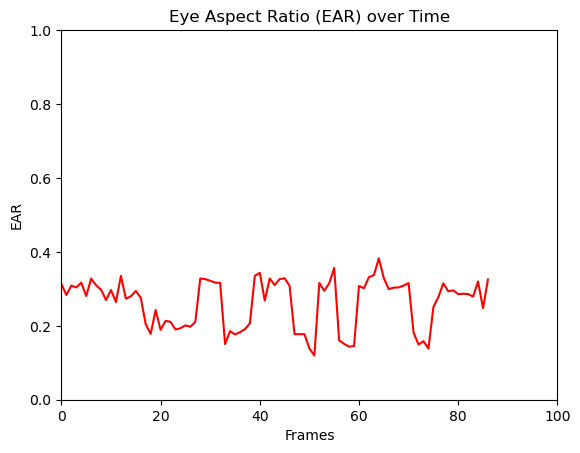

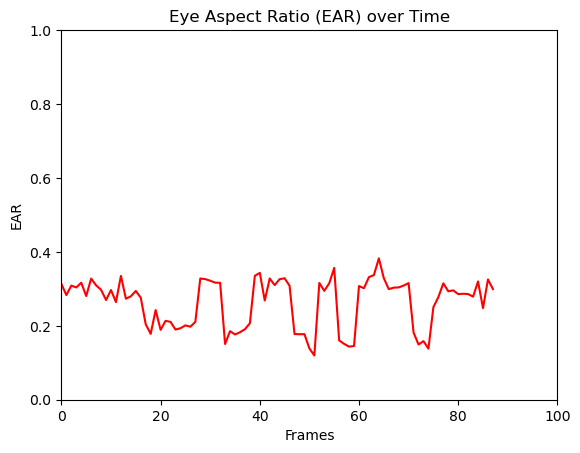

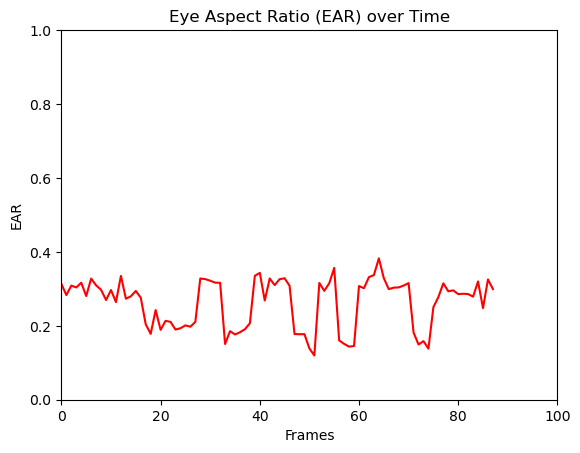

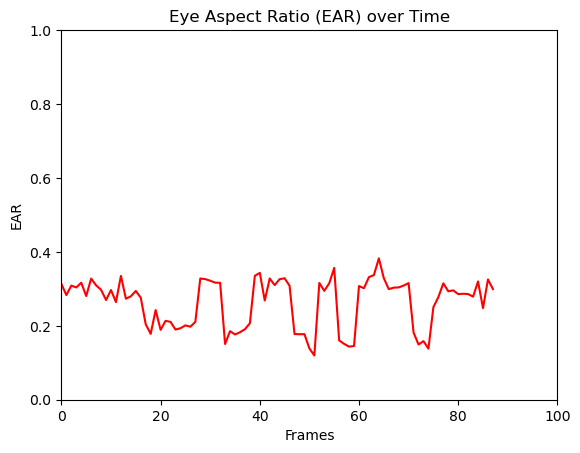

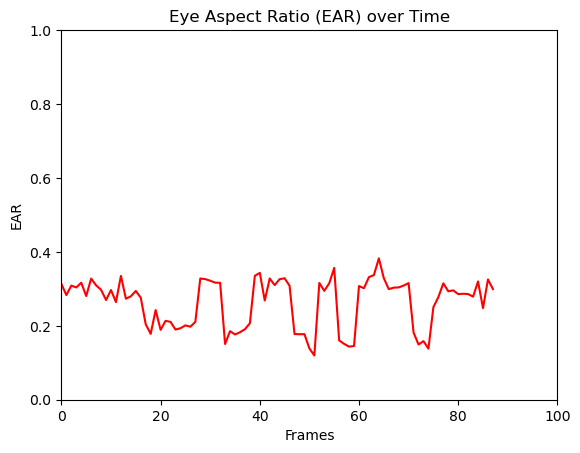

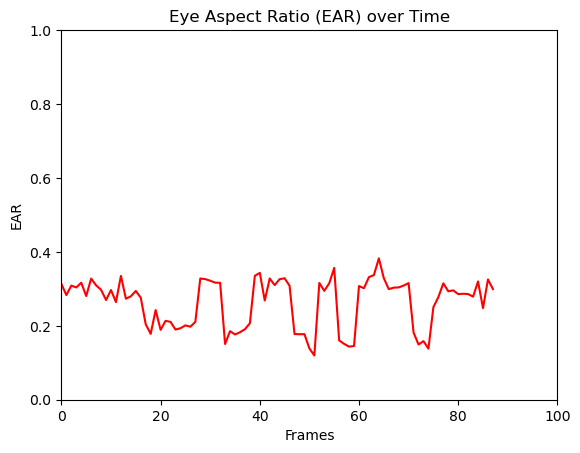

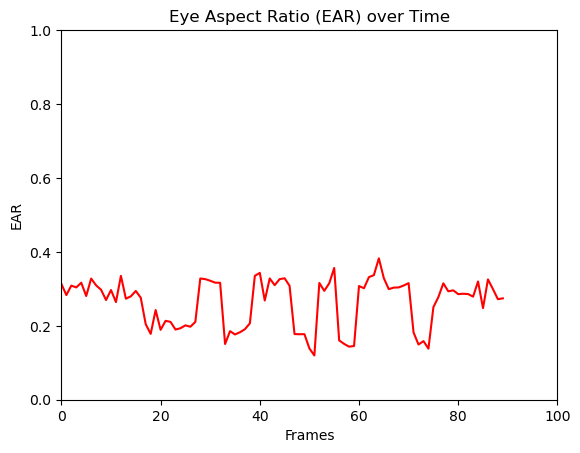

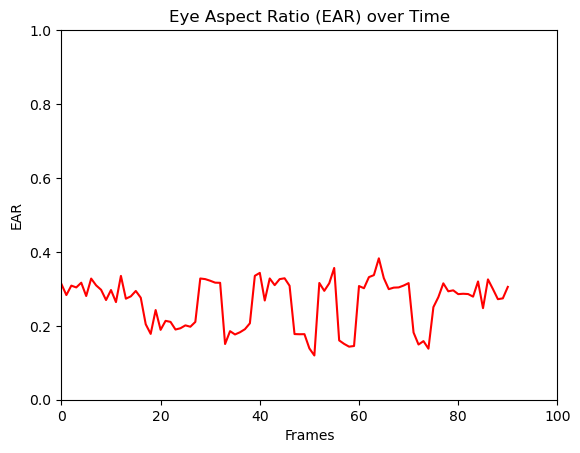

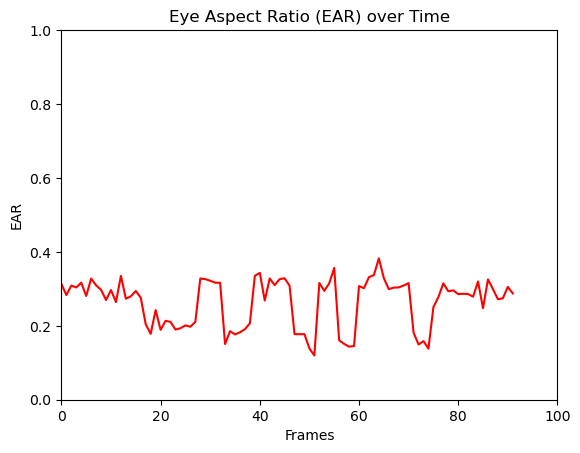

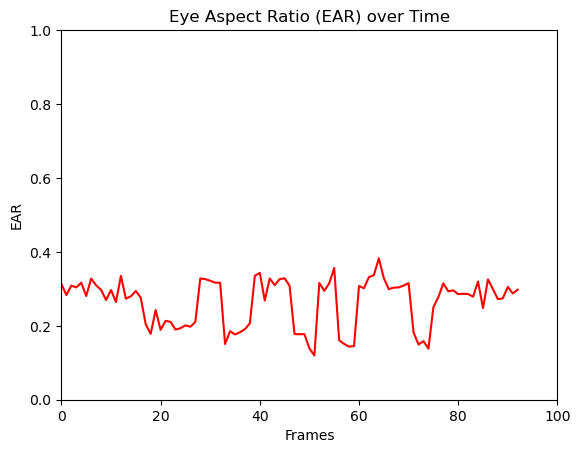

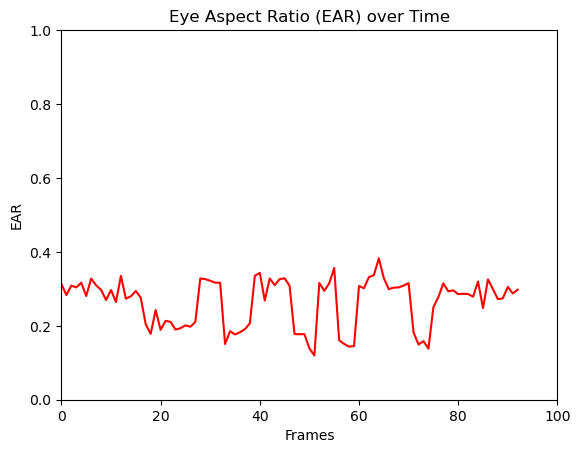

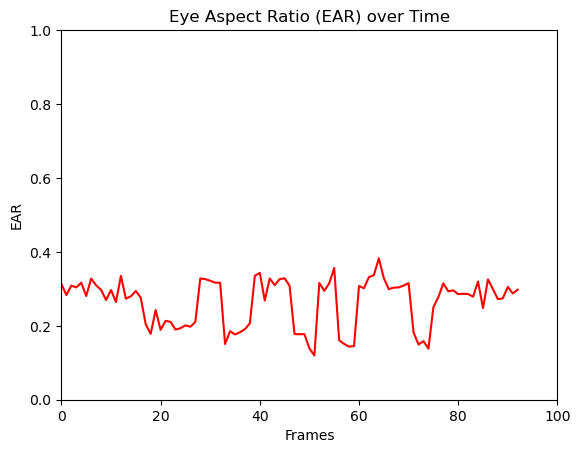

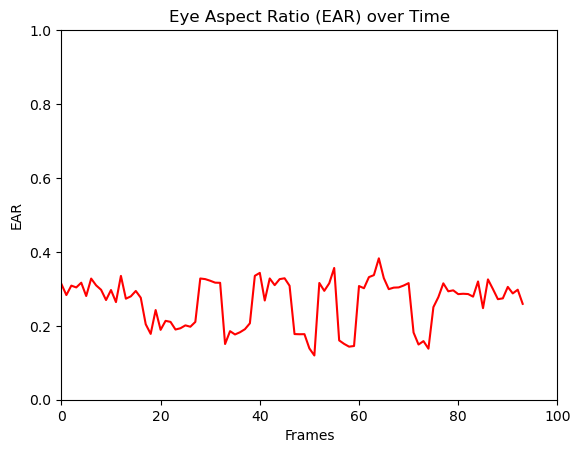

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import csv
from datetime import datetime
import dlib
from scipy.spatial import distance as dist
import winsound
import os
import matplotlib.pyplot as plt
from collections import deque

# Paths
PREDICTOR_PATH = r"C:\Users\ujwal\Downloads\shape_predictor_68_face_landmarks.dat\shape_predictor_68_face_landmarks.dat"
CASCADE_PATH = r"C:\Users\ujwal\Downloads\haarcascade_frontalface_default (1).xml"
YOLO_CONFIG = r"C:/Users/ujwal/Downloads/yolov3.cfg"
YOLO_WEIGHTS = r"C:/Users/ujwal/Downloads/yolov3.weights"
YOLO_CLASSES = r"C:/Users/ujwal/Downloads/coco.names"

# Load YOLO model
net = cv2.dnn.readNetFromDarknet(YOLO_CONFIG, YOLO_WEIGHTS)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Load YOLO class names
with open(YOLO_CLASSES, "r") as f:
    classes = f.read().strip().split("\n")

# Load Haar Cascade and dlib's predictor
face_cascade = cv2.CascadeClassifier(CASCADE_PATH)
if face_cascade.empty():
    raise IOError("Error: Haar Cascade XML file not loaded correctly.")
predictor = dlib.shape_predictor(PREDICTOR_PATH)

# Constants
EAR_THRESHOLD = 0.22
EAR_CONSEC_FRAMES = 2
LEFT_EYE = list(range(36, 42))
RIGHT_EYE = list(range(42, 48))
FRAME_WIDTH, FRAME_HEIGHT = 720, 480

# Variables
frame_counter = 0
drowsy_alert = False
drowsiness_start = None
total_drowsy_duration = 0
ear_history = deque(maxlen=100)  # Store the last 100 EAR values

# CSV File Setup
LOG_FILE = "drowsiness_log.csv"
if not os.path.exists(LOG_FILE):
    with open(LOG_FILE, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Timestamp", "Event", "Duration"])

# EAR Calculation
def calculate_ear(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    return (A + B) / (2.0 * C)

# Play alarm
def play_alarm():
    frequency = 2000
    duration = 500
    winsound.Beep(frequency, duration)

# Log drowsiness event
def log_alert(duration):
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    with open(LOG_FILE, mode="a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow([timestamp, "Drowsiness Detected", f"{duration:.2f} seconds"])

# YOLO Object Detection
def yolo_detect(frame):
    height, width = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    output_layers = net.getUnconnectedOutLayersNames()
    detections = net.forward(output_layers)

    boxes, confidences, class_ids = [], [], []
    for detection in detections:
        for obj in detection:
            scores = obj[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # Adjust threshold as needed
                box = obj[0:4] * np.array([width, height, width, height])
                (centerX, centerY, w, h) = box.astype("int")
                x = int(centerX - (w / 2))
                y = int(centerY - (h / 2))
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply Non-Maximum Suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)  # confidence > 0.5, NMS threshold 0.4
    if len(indices) > 0:
        for i in indices.flatten():
            x, y, w, h = boxes[i]
            label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Plot EAR History
def plot_ear_history():
    plt.clf()  # Clear the current plot
    plt.plot(list(range(len(ear_history))), list(ear_history), label="EAR", color="r")
    plt.title("Eye Aspect Ratio (EAR) over Time")
    plt.xlabel("Frames")
    plt.ylabel("EAR")
    plt.xlim(0, 100)  # Limit x-axis to show the latest 100 frames
    plt.ylim(0, 1)
    plt.draw()
    plt.pause(0.01)  # Pause for a short period to update the plot

# Main loop
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, FRAME_WIDTH)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, FRAME_HEIGHT)

# Setup Matplotlib figure for real-time plotting
plt.ion()  # Interactive mode on
plt.figure(figsize=(6, 3))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Perform YOLO object detection
    yolo_detect(frame)

    for (x, y, w, h) in faces:
        rect = dlib.rectangle(x, y, x + w, y + h)
        landmarks = predictor(gray, rect)

        # Calculate EAR
        left_eye = np.array([(landmarks.part(i).x, landmarks.part(i).y) for i in LEFT_EYE])
        right_eye = np.array([(landmarks.part(i).x, landmarks.part(i).y) for i in RIGHT_EYE])
        left_ear = calculate_ear(left_eye)
        right_ear = calculate_ear(right_eye)
        ear = (left_ear + right_ear) / 2.0

        # Store EAR for graph plotting
        ear_history.append(ear)

        # Check drowsiness
        if ear < EAR_THRESHOLD:
            frame_counter += 1
            if frame_counter >= EAR_CONSEC_FRAMES:
                if not drowsy_alert:
                    drowsy_alert = True
                    drowsiness_start = datetime.now()

                play_alarm()
                drowsy_duration = (datetime.now() - drowsiness_start).total_seconds()
                cv2.putText(frame, "DROWSINESS DETECTED!", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)
                cv2.putText(frame, f"Duration: {drowsy_duration:.2f} sec", (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        else:
            if drowsy_alert:
                drowsy_alert = False
                drowsy_duration = (datetime.now() - drowsiness_start).total_seconds()
                total_drowsy_duration += drowsy_duration
                log_alert(drowsy_duration)

            frame_counter = 0

        # Draw eye rectangles
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, f"EAR: {ear:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Display the total duration of drowsiness
    cv2.putText(frame, f"Total Drowsy Time: {total_drowsy_duration:.2f} sec", (20, FRAME_HEIGHT - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2)

    # Show the frame
    cv2.imshow("Drowsiness Detection", frame)

    # Update EAR graph
    plot_ear_history()

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
!pip install playsound
